# ***Section 1: Importing Necessary Libraries***

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# ***Section 2: Reading Datasets and Initial Exploration***

##  **1.Loading the Dataset**





In [192]:
df = pd.read_csv('/content/corporate_stress_dataset.csv',index_col=0)

## **2. Displaying Basic Information About the Dataset**

In [193]:
df.head(10)

Age      Gender Marital_Status   Job_Role  Experience_Years  \
ID                                                                
1    56  Non-Binary        Widowed  Developer                 5   
2    46      Female         Single    Analyst                20   
3    32      Female         Single  Developer                10   
4    60      Female       Divorced    Analyst                26   
5    25        Male        Married      Sales                29   
6    38  Non-Binary         Single    Manager                13   
7    56  Non-Binary         Single         HR                17   
8    36      Female       Divorced      Sales                 5   
9    40  Non-Binary       Divorced    Manager                40   
10   28        Male       Divorced    Support                31   

    Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
ID                                                                   
1            102703.08                      44                1.72   
2            165583.91                      54                0.62   
3             38005.39                      81                1.22   
4             51127.36                      79                2.03   
5            174597.45                      63                1.45   
6             37595.90                      45                0.48   
7             46786.46                      44                0.23   
8             49639.66                      46                2.30   
9            156978.32                      66                0.30   
10            85163.20                      56                1.91   

    Remote_Work  Stress_Level  ... Work_Life_Balance Family_Support_Level  \
ID                             ...                                          
1          True             0  ...                 9                    2   
2          True             7  ...                 9                    1   
3         False             7  ...                 6                    1   
4         False             6  ...                 8                   10   
5          True             8  ...                 3                    1   
6          True             2  ...                 6                    0   
7         False             4  ...                 9                    4   
8         False             6  ...                 4                    2   
9         False             1  ...                 6                    5   
10         True             9  ...                10                    9   

   Job_Satisfaction  Performance_Rating  Team_Size  Training_Opportunities  \
ID                                                                           
1                 5                  10         38                   False   
2                10                   9         72                    True   
3                 1                   1         67                   False   
4                 5                  10         98                    True   
5                 9                   2         85                    True   
6                 7                   2         22                    True   
7                 2                  10         39                   False   
8                 5                   4         44                   False   
9                 5                   1         46                   False   
10                0                   9         48                    True   

    Gender_Bias_Experienced  Discrimination_Experienced  Burnout_Symptoms  \
ID                                                                          
1                      True                        True                No   
2                      True                        True                No   
3                     False                       False               Yes   
4                      True                       False               Yes   
5                     False       

In [194]:
df.dtypes

Age                                   int64
Gender                               object
Marital_Status                       object
Job_Role                             object
Experience_Years                      int64
Monthly_Salary_INR                  float64
Working_Hours_per_Week                int64
Commute_Time_Hours                  float64
Remote_Work                            bool
Stress_Level                          int64
Health_Issues                        object
Company_Size                         object
Department                           object
Sleep_Hours                         float64
Physical_Activity_Hours_per_Week    float64
Mental_Health_Leave_Taken              bool
Manager_Support_Level                 int64
Work_Pressure_Level                   int64
Annual_Leaves_Taken                   int64
Work_Life_Balance                     int64
Family_Support_Level                  int64
Job_Satisfaction                      int64
Performance_Rating                    int64
Team_Size                             int64
Training_Opportunities                 bool
Gender_Bias_Experienced                bool
Discrimination_Experienced             bool
Burnout_Symptoms                     object
Location                             object
dtype: object

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Gender                            50000 non-null  object 
 2   Marital_Status                    50000 non-null  object 
 3   Job_Role                          50000 non-null  object 
 4   Experience_Years                  50000 non-null  int64  
 5   Monthly_Salary_INR                50000 non-null  float64
 6   Working_Hours_per_Week            50000 non-null  int64  
 7   Commute_Time_Hours                50000 non-null  float64
 8   Remote_Work                       50000 non-null  bool   
 9   Stress_Level                      50000 non-null  int64  
 10  Health_Issues                     37459 non-null  object 
 11  Company_Size                      50000 non-null  object 
 12  Departmen

In [196]:
df.shape

(50000, 29)

## **3.Descriptive Statistics**

In [197]:
df.describe()

Age  Experience_Years  Monthly_Salary_INR  \
count  50000.000000      50000.000000        50000.000000   
mean      41.518600         20.071580       110129.926165   
std       13.833279         11.835681        52069.676542   
min       18.000000          0.000000        20001.960000   
25%       30.000000         10.000000        64875.487500   
50%       41.000000         20.000000       110168.205000   
75%       54.000000         30.000000       155322.665000   
max       65.000000         40.000000       199992.800000   

       Working_Hours_per_Week  Commute_Time_Hours  Stress_Level   Sleep_Hours  \
count             50000.00000        50000.000000  50000.000000  50000.000000   
mean                 62.53824            1.500454      5.004680      6.498888   
std                  16.16981            0.867738      3.154745      1.437200   
min                  35.00000            0.000000      0.000000      4.000000   
25%                  49.00000            0.740000      2.000000      5.300000   
50%                  62.00000            1.500000      5.000000      6.500000   
75%                  77.00000            2.250000      8.000000      7.700000   
max                  90.00000            3.000000     10.000000      9.000000   

       Physical_Activity_Hours_per_Week  Manager_Support_Level  \
count                      50000.000000           50000.000000   
mean                           5.011624               5.004120   
std                            2.885061               3.160314   
min                            0.000000               0.000000   
25%                            2.500000               2.000000   
50%                            5.000000               5.000000   
75%                            7.500000               8.000000   
max                           10.000000              10.000000   

       Work_Pressure_Level  Annual_Leaves_Taken  Work_Life_Balance  \
count         50000.000000         50000.000000       50000.000000   
mean              5.004420            14.992300           4.996920   
std               3.159614             8.943398           3.165728   
min               0.000000             0.000000           0.000000   
25%               2.000000             7.000000           2.000000   
50%               5.000000            15.000000           5.000000   
75%               8.000000            23.000000           8.000000   
max              10.000000            30.000000          10.000000   

       Family_Support_Level  Job_Satisfaction  Performance_Rating    Team_Size  
count          50000.000000       50000.00000        50000.000000  50000.00000  
mean               4.993940           4.98412            5.006940     50.49730  
std                3.160674           3.16003            3.176535     28.89238  
min                0.000000           0.00000            0.000000      1.00000  
25%                2.000000           2.00000            2.000000     25.00000  
50%                5.000000           5.00000            5.000000     51.00000  
75%                8.000000           8.00000            8.000000     75.00000  
max               10.000000          10.00000           10.000000    100.00000

## **4-Checking for Missing & Duplicated Values**

In [198]:
df.isnull().sum()

Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                0
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      0
Remote_Work                             0
Stress_Level                            0
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               0
Manager_Support_Level                   0
Work_Pressure_Level                     0
Annual_Leaves_Taken                     0
Work_Life_Balance                       0
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                      0
Team_Size                               0
Training_Opportunities                  0
Gender_Bias_Experienced                 0
Discrimination_Experienced              0
Burnout_Symptoms                        0
Location                                0
dtype: int64

<Axes: >

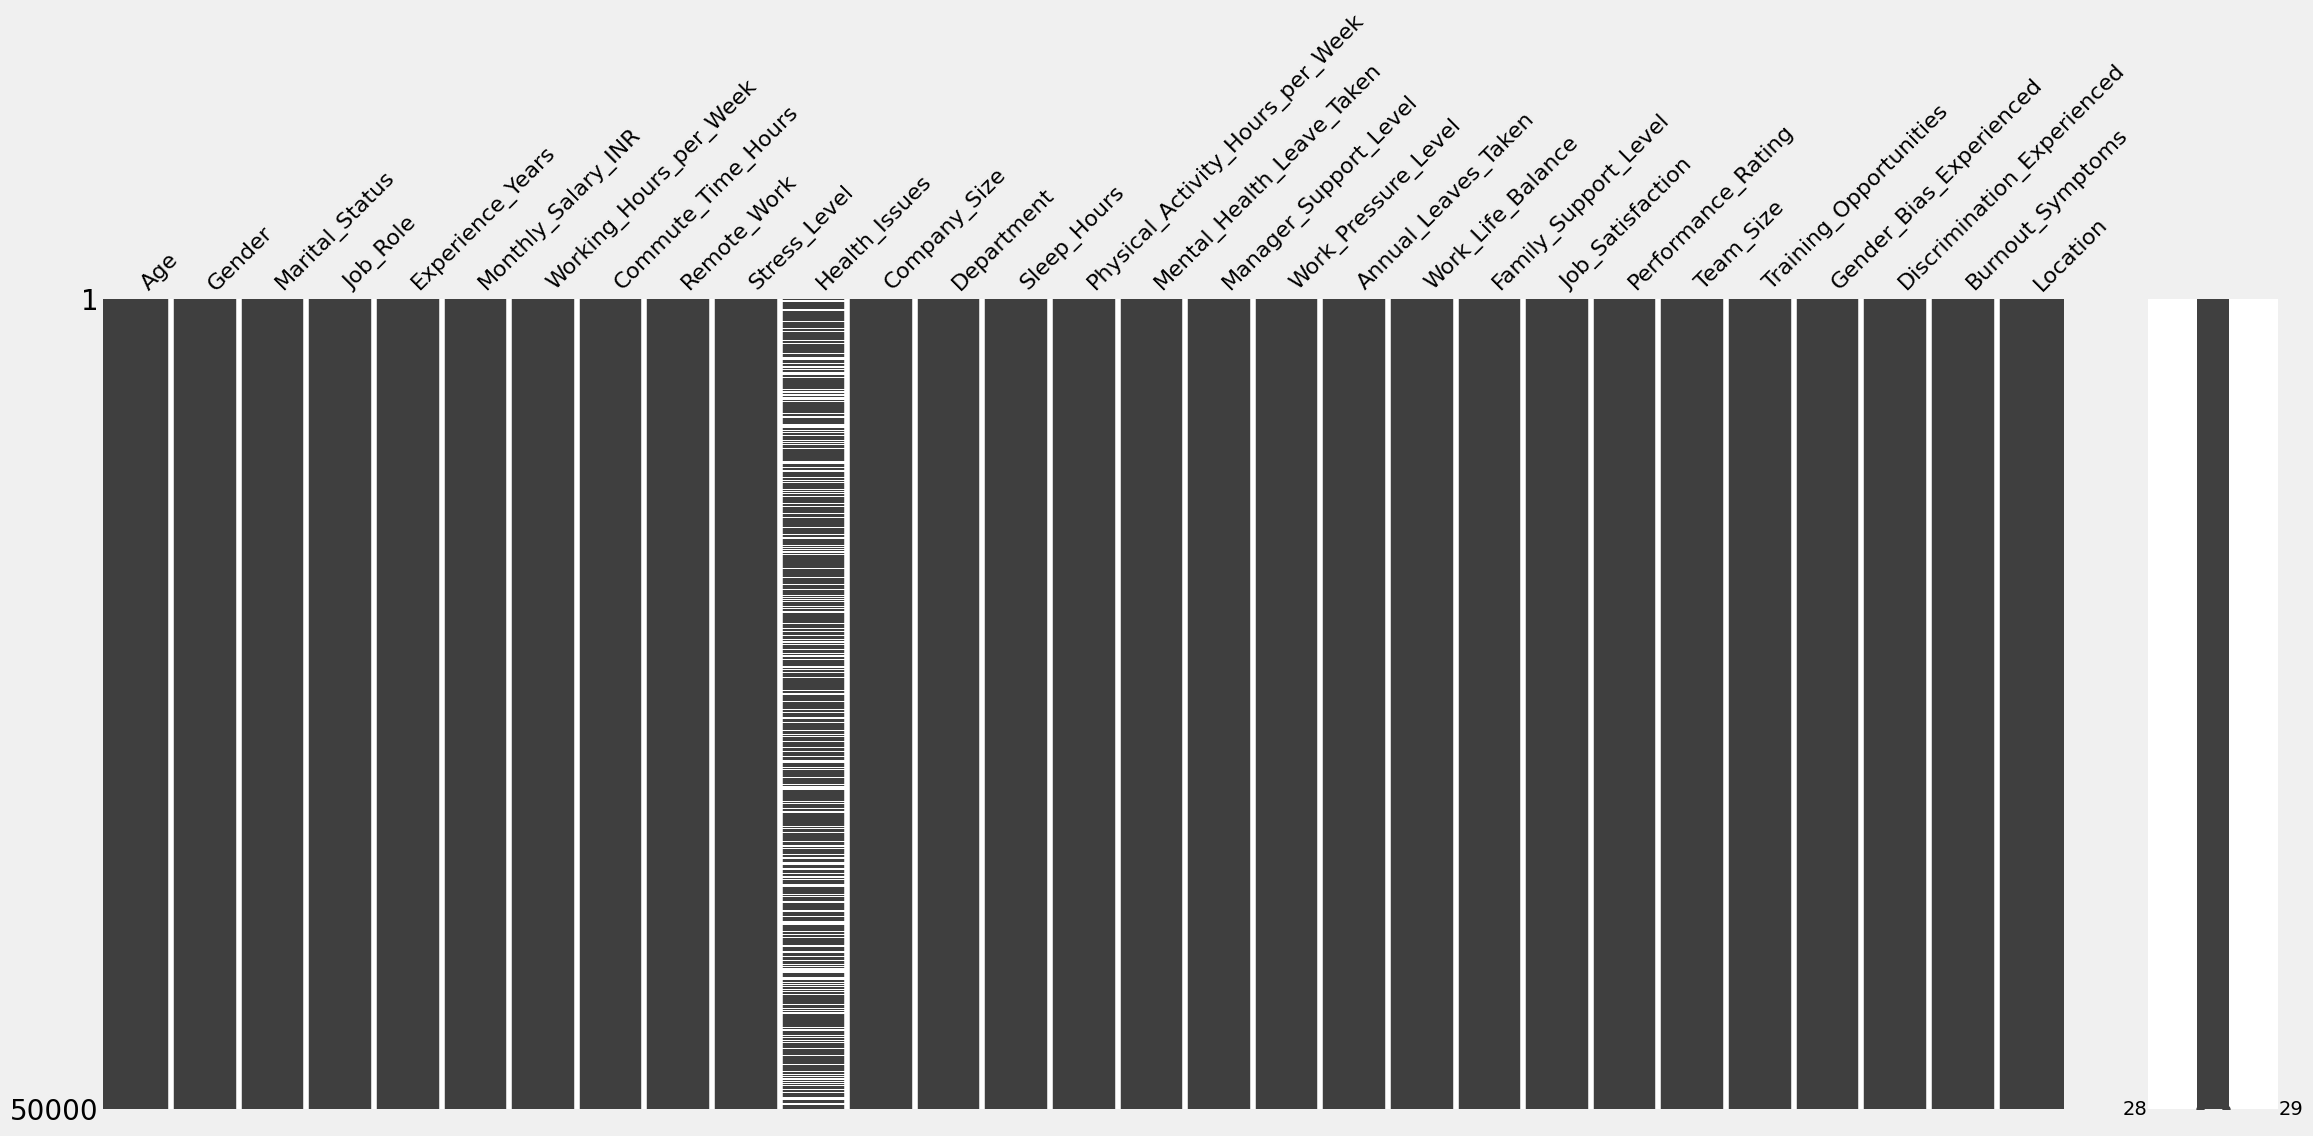

In [199]:
msno.matrix(df)

In [200]:
df.duplicated().sum()

0

## **5- Unique Values**

In [201]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Gender': ['Non-Binary' 'Female' 'Male']
Unique values in column 'Marital_Status': ['Widowed' 'Single' 'Divorced' 'Married']
Unique values in column 'Job_Role': ['Developer' 'Analyst' 'Sales' 'Manager' 'HR' 'Support']
Unique values in column 'Health_Issues': [nan 'Physical' 'Mental' 'Both']
Unique values in column 'Company_Size': ['Small' 'Large' 'Medium']
Unique values in column 'Department': ['Marketing' 'IT' 'HR' 'Sales' 'Admin' 'Finance']
Unique values in column 'Burnout_Symptoms': ['No' 'Yes' 'Occasional']
Unique values in column 'Location': ['Tier-3' 'Metro' 'Tier-1' 'Tier-2']


# ***Section 3: Data Cleaning and Preprocessing***

###  **1. Missing or Duplicated Data**

In [202]:
df['Health_Issues'].fillna('No issues' , inplace=True)

In [203]:
for i in df['Gender']:
  if i == 'Non-Binary':
    df['Gender'].replace(i, 'other', inplace=True)


# ***Section 4: Exploratory Data Analysis (EDA)***

In [204]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
bool_cols = df.select_dtypes(include='bool').columns

## **1.  Basic EDA**

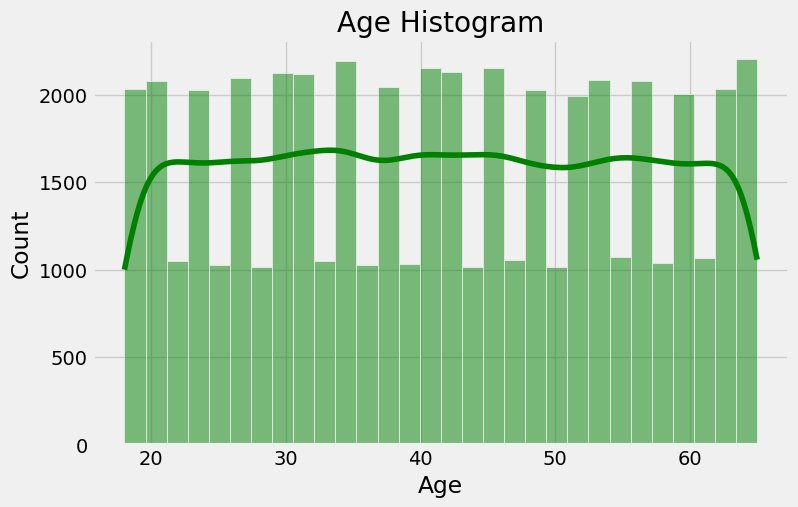

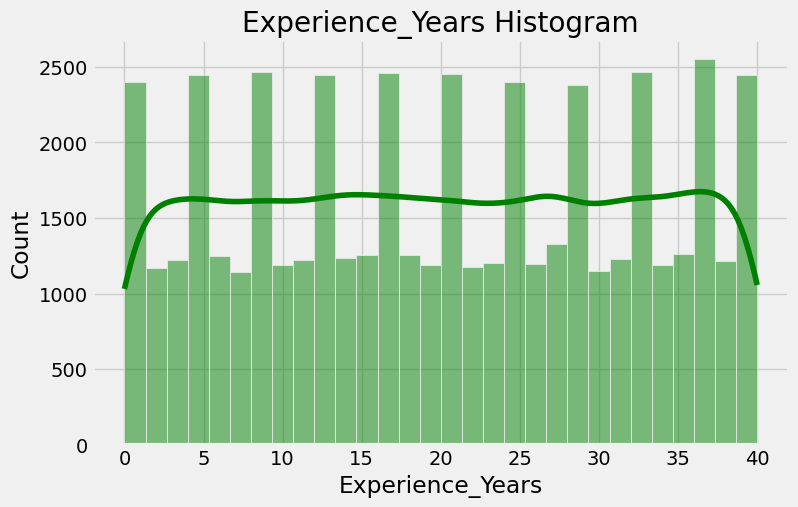

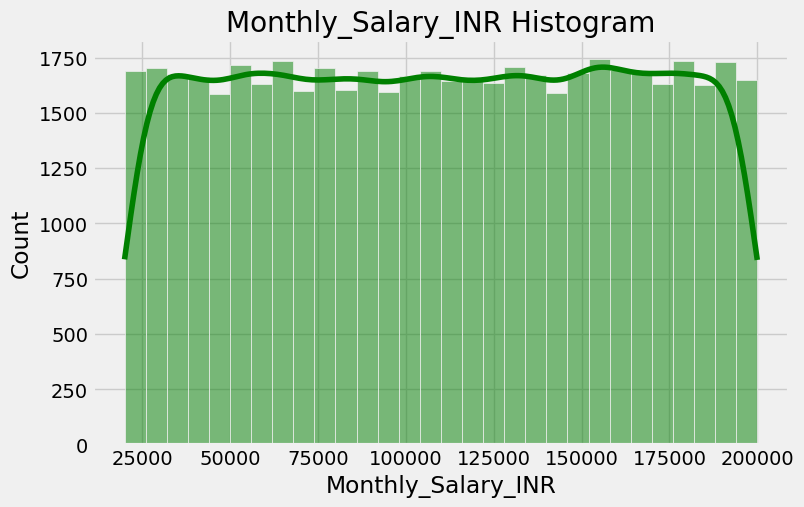

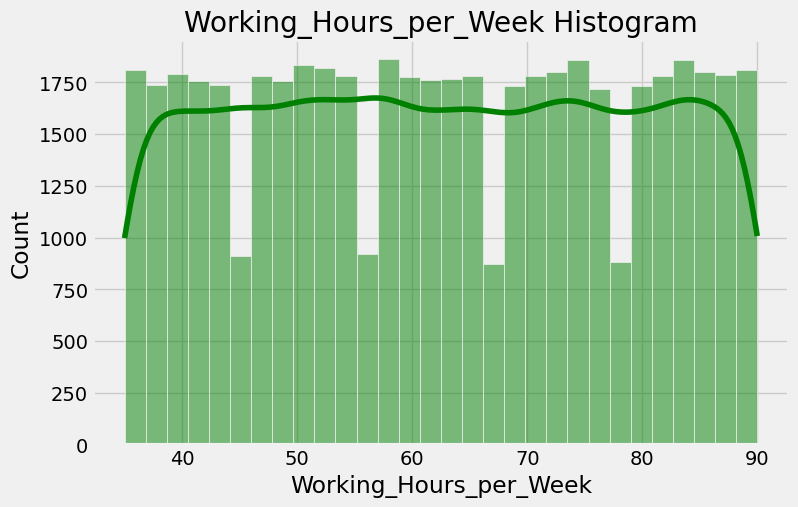

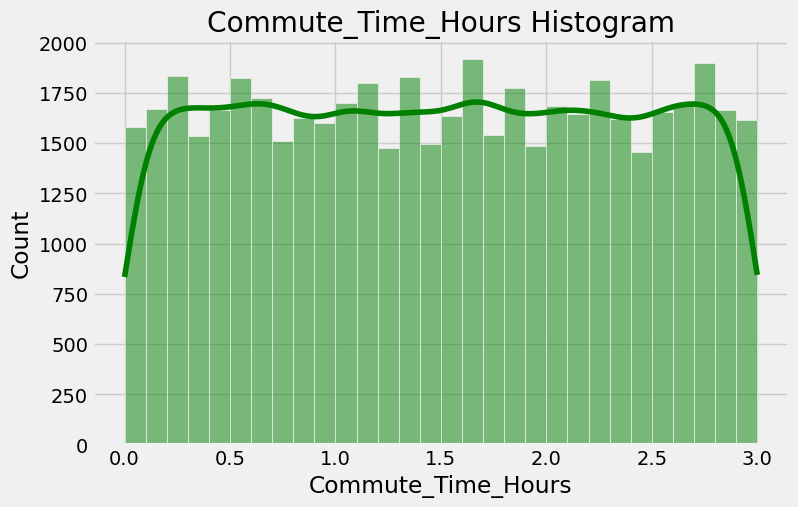

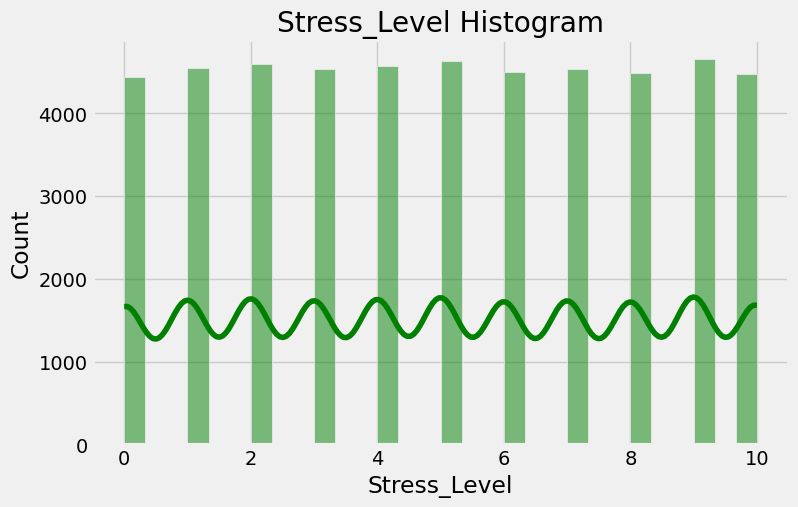

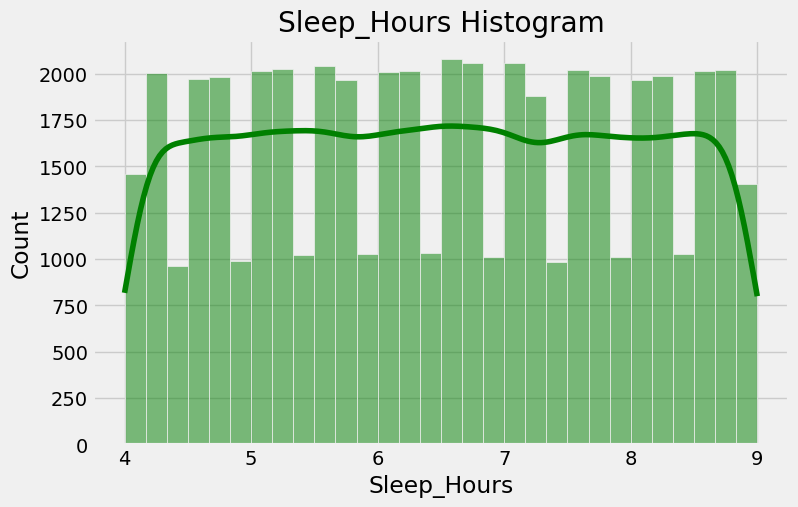

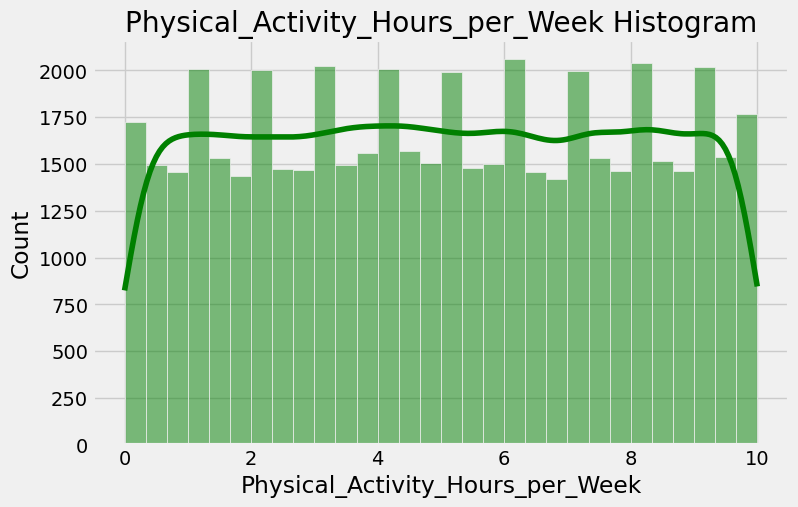

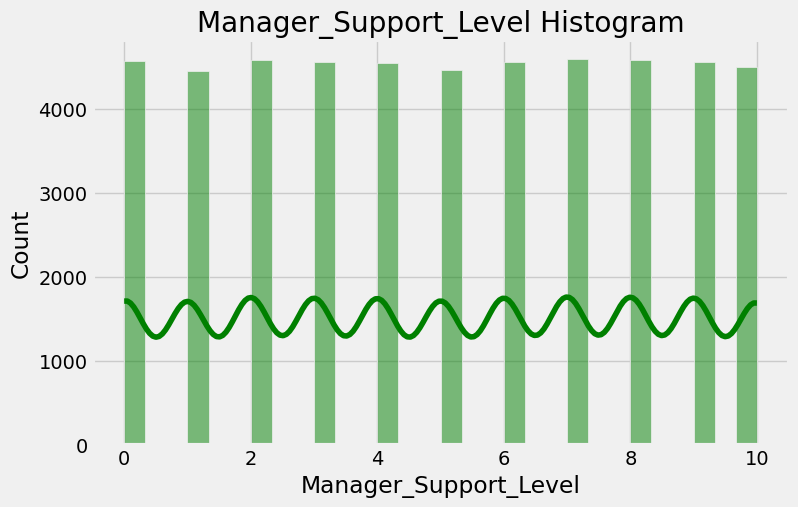

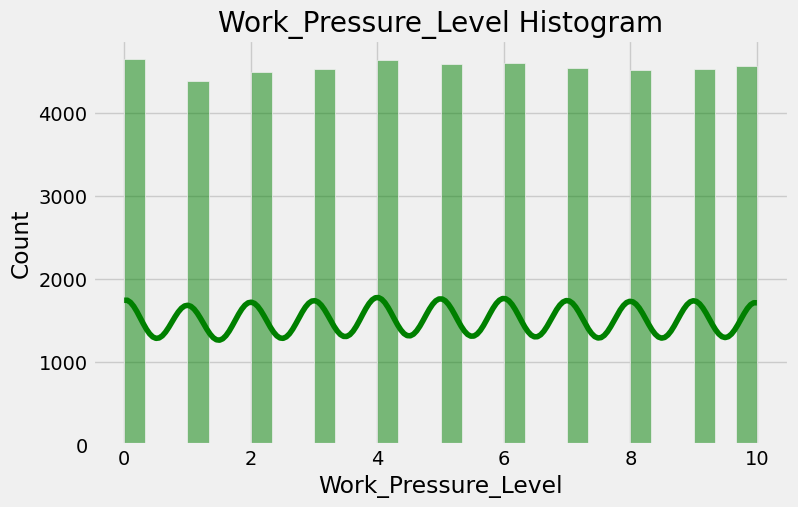

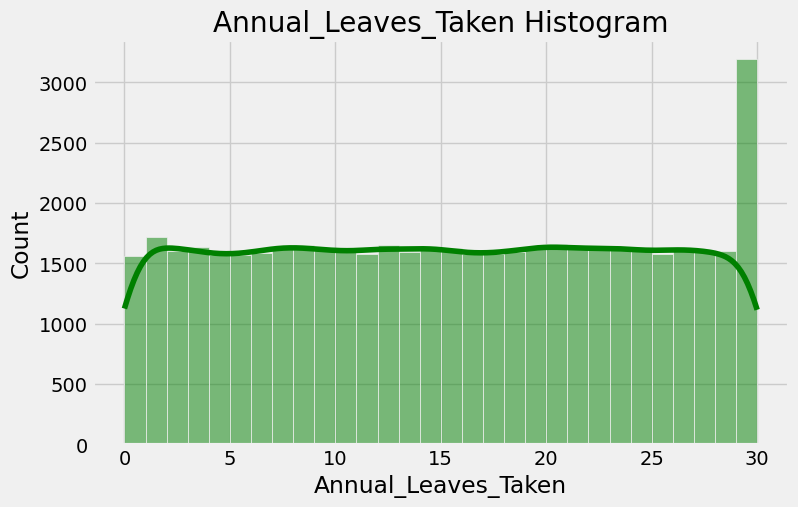

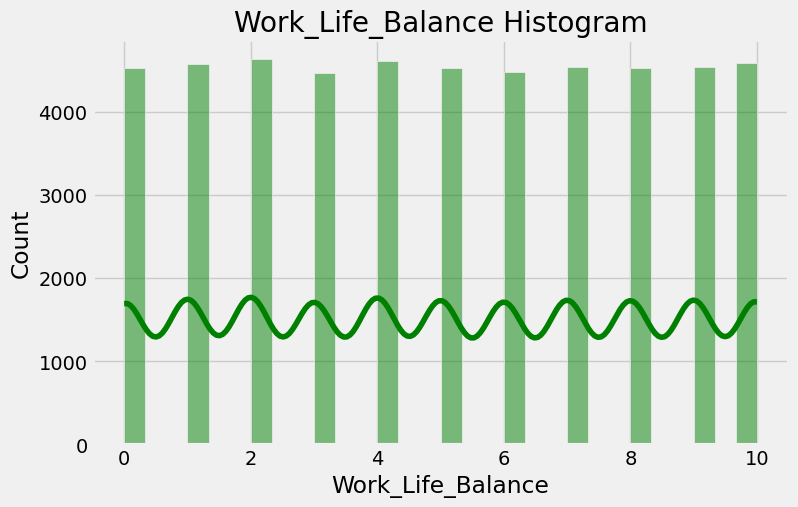

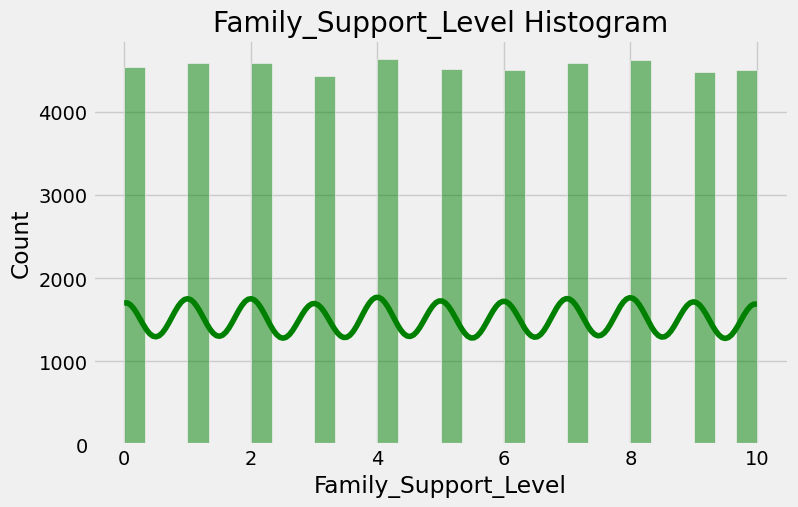

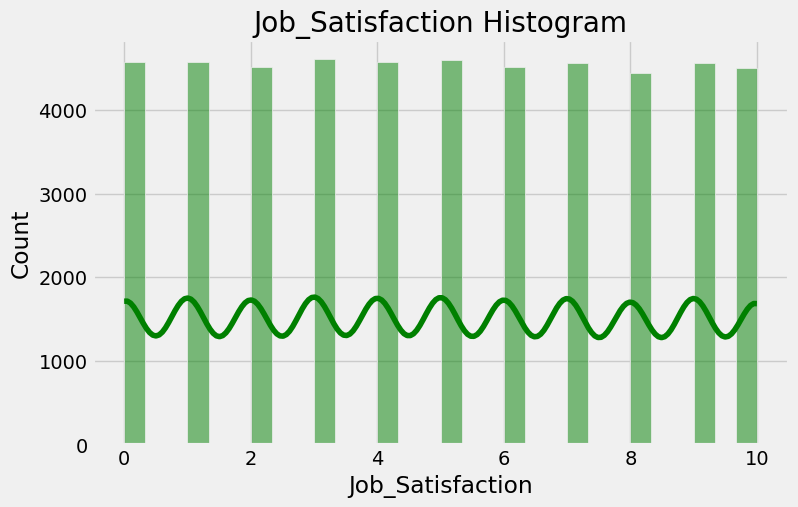

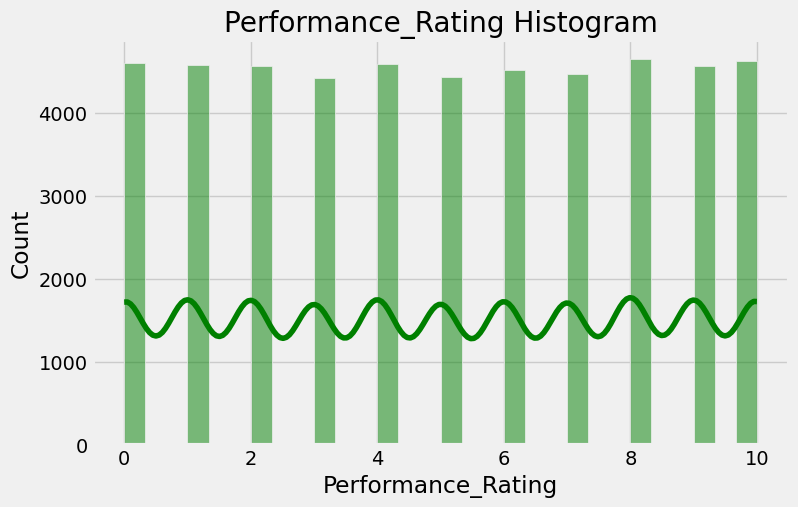

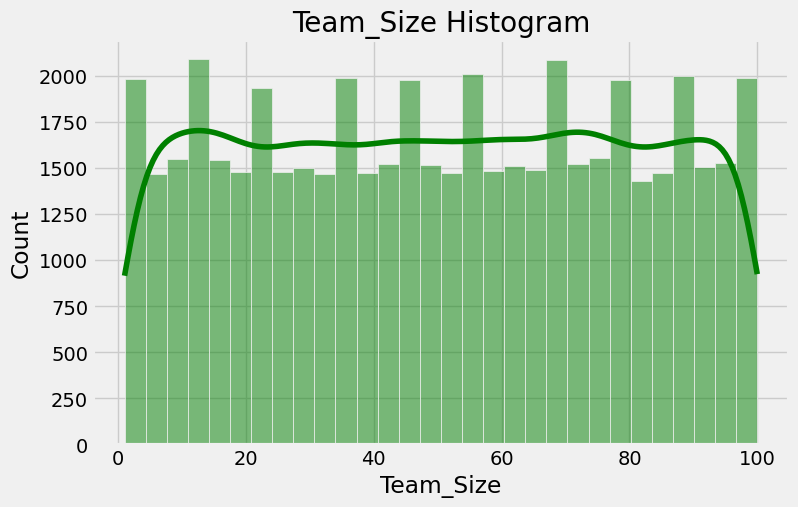

In [69]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[col] , kde=True , bins=30 , color='Green')
  plt.title(f'{col} Histogram')
  plt.show()

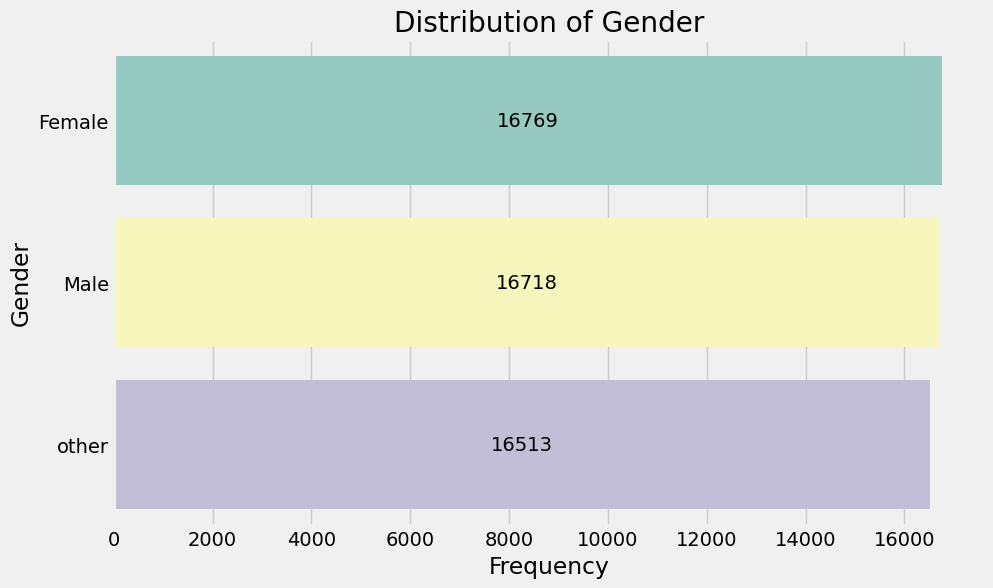

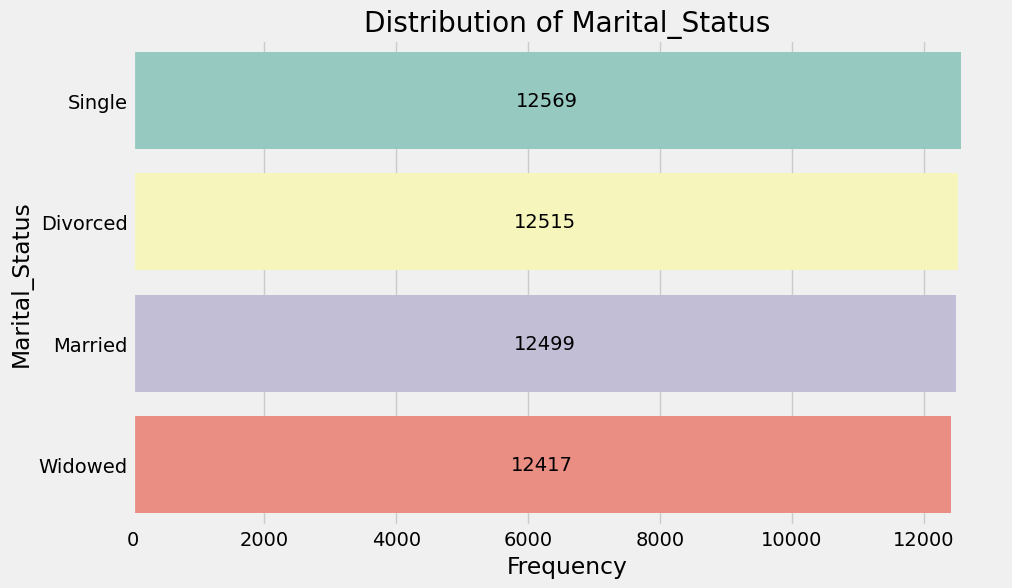

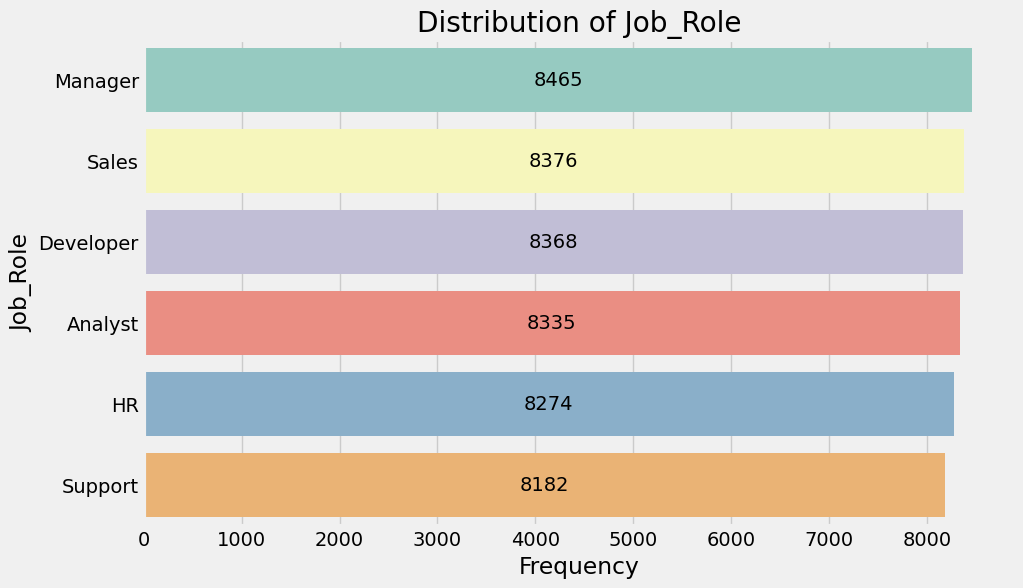

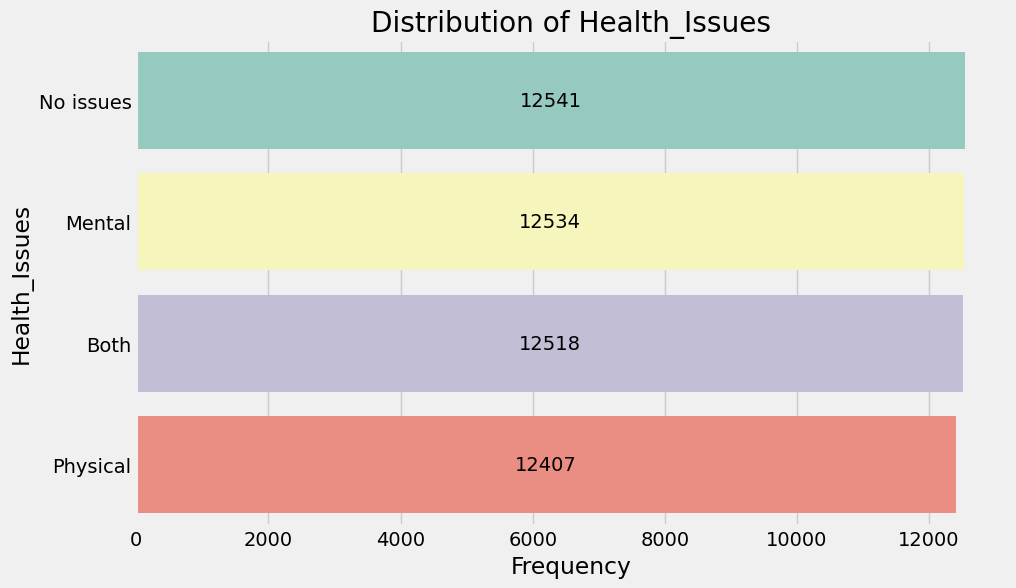

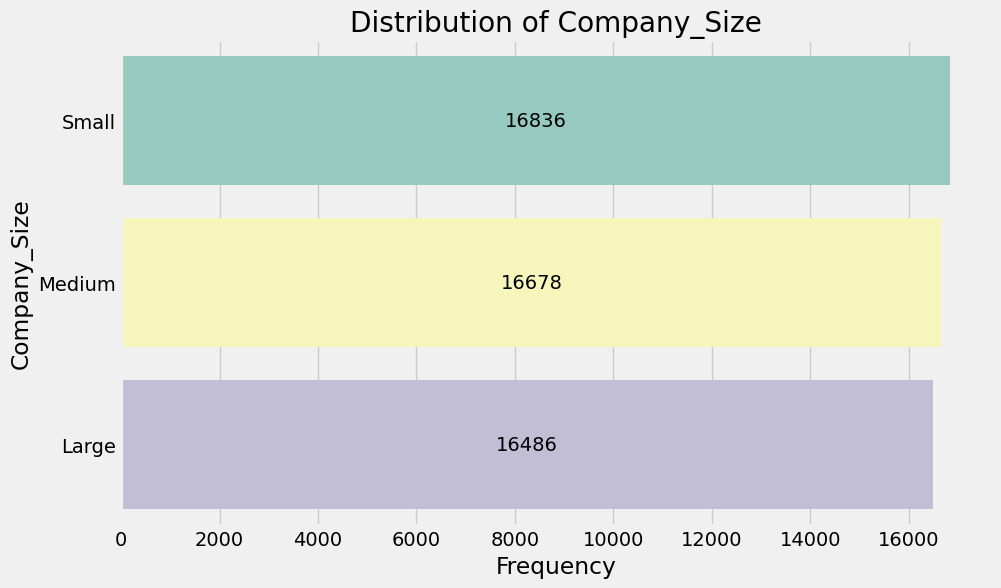

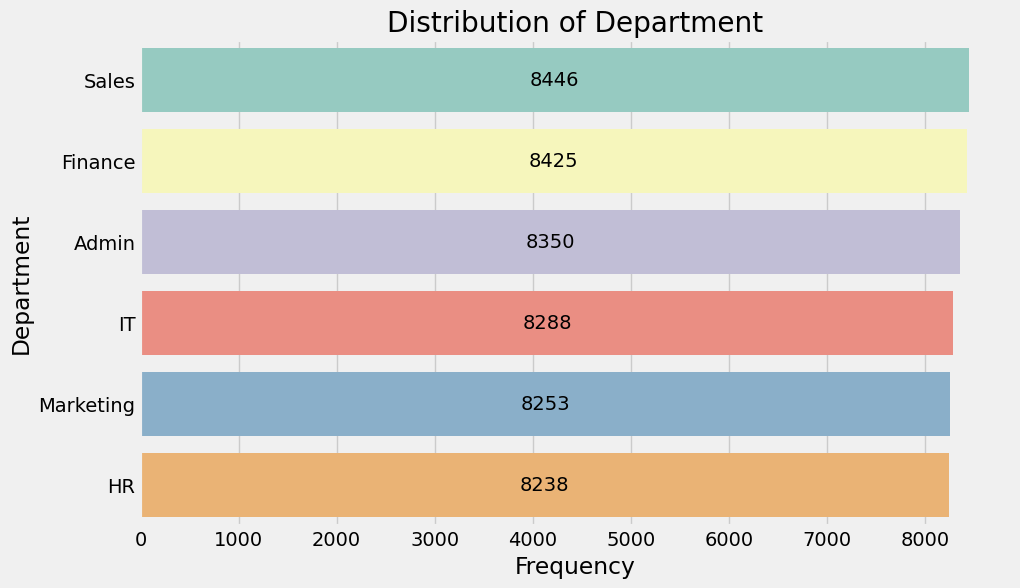

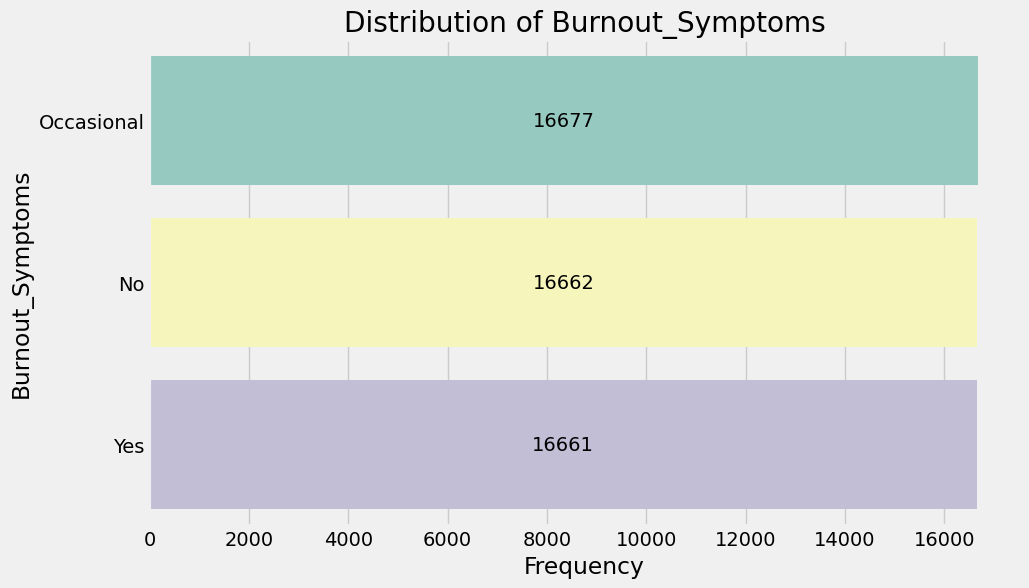

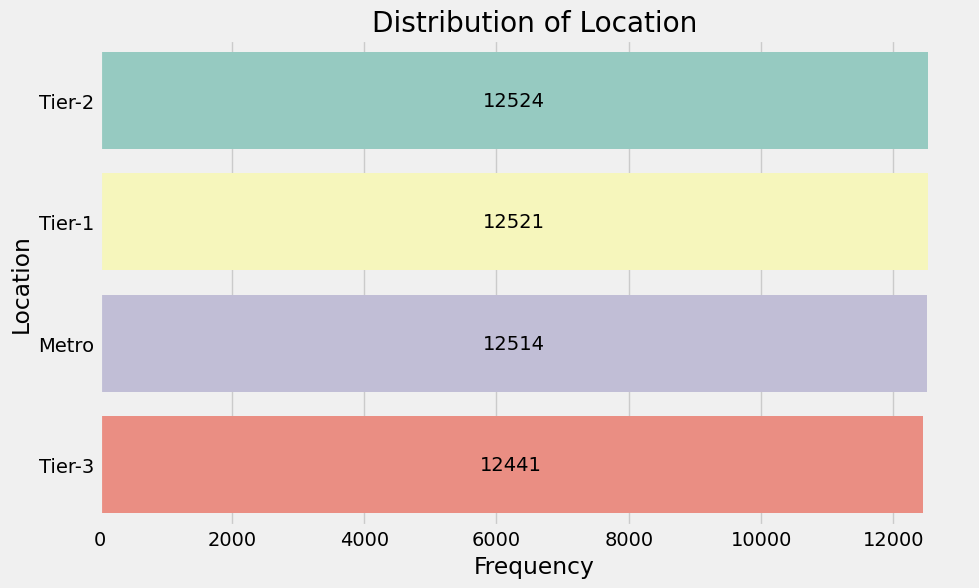

In [33]:
for col in cat_cols :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

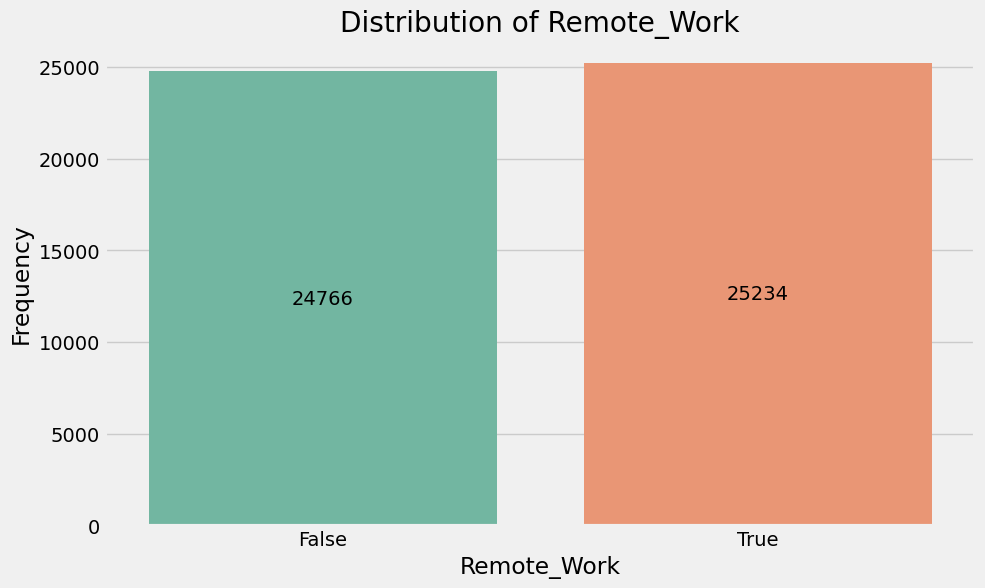

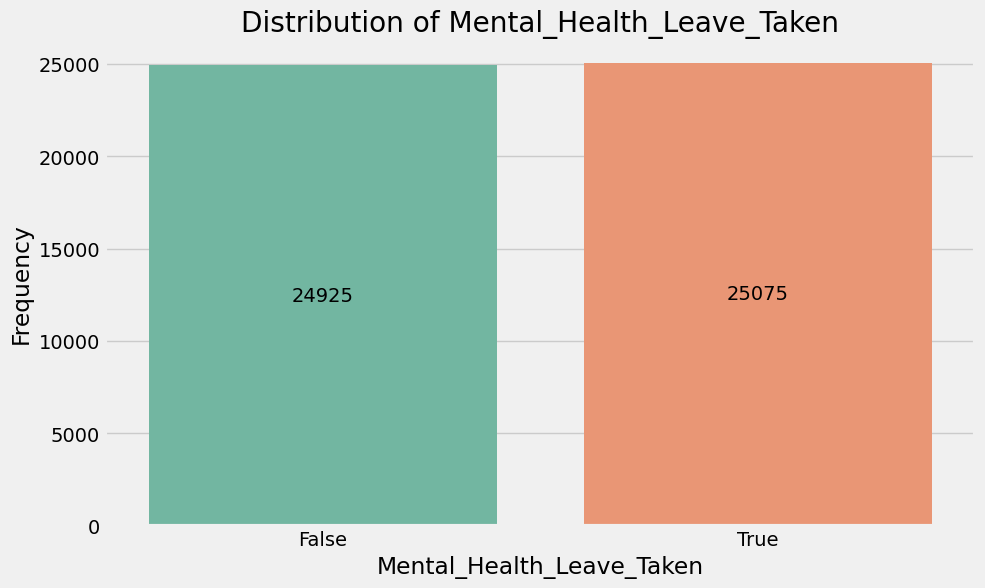

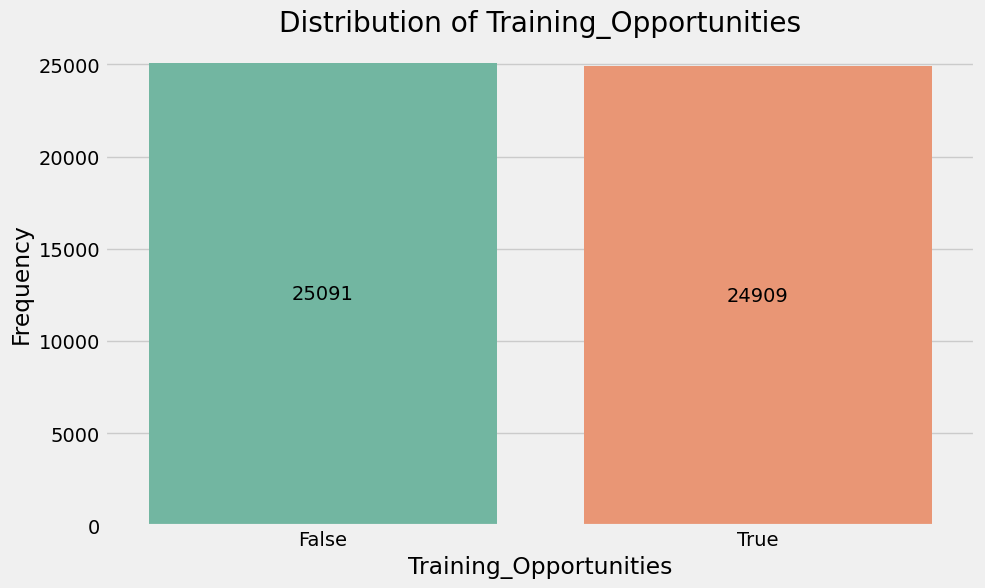

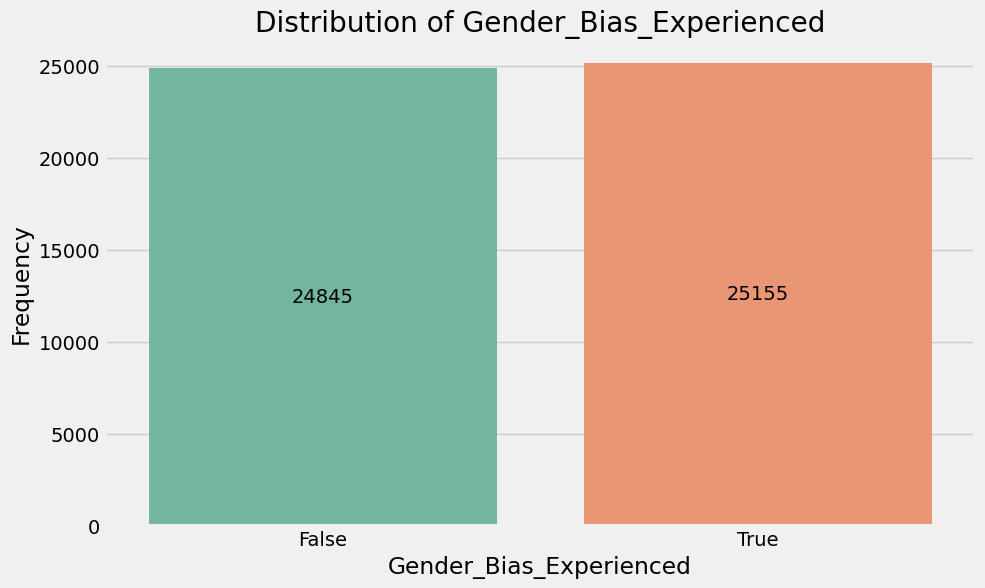

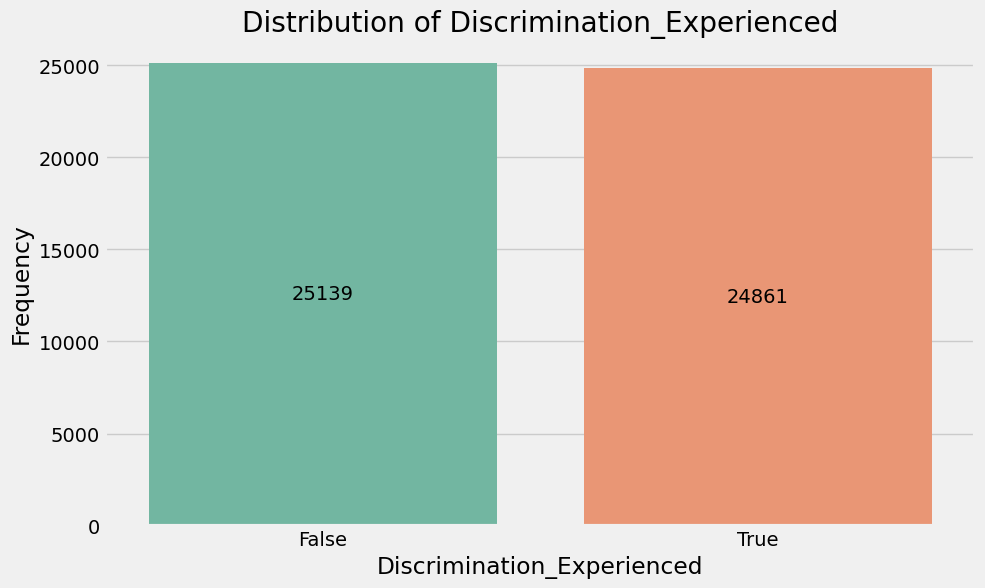

In [46]:
for col in bool_cols:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)

    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2,
              height / 2,
            '{:1.0f}'.format(height),
            ha="center",
            va="center")
    plt.show()


## **2.  Medium EDA(Exploring Relationships and Patterns)**

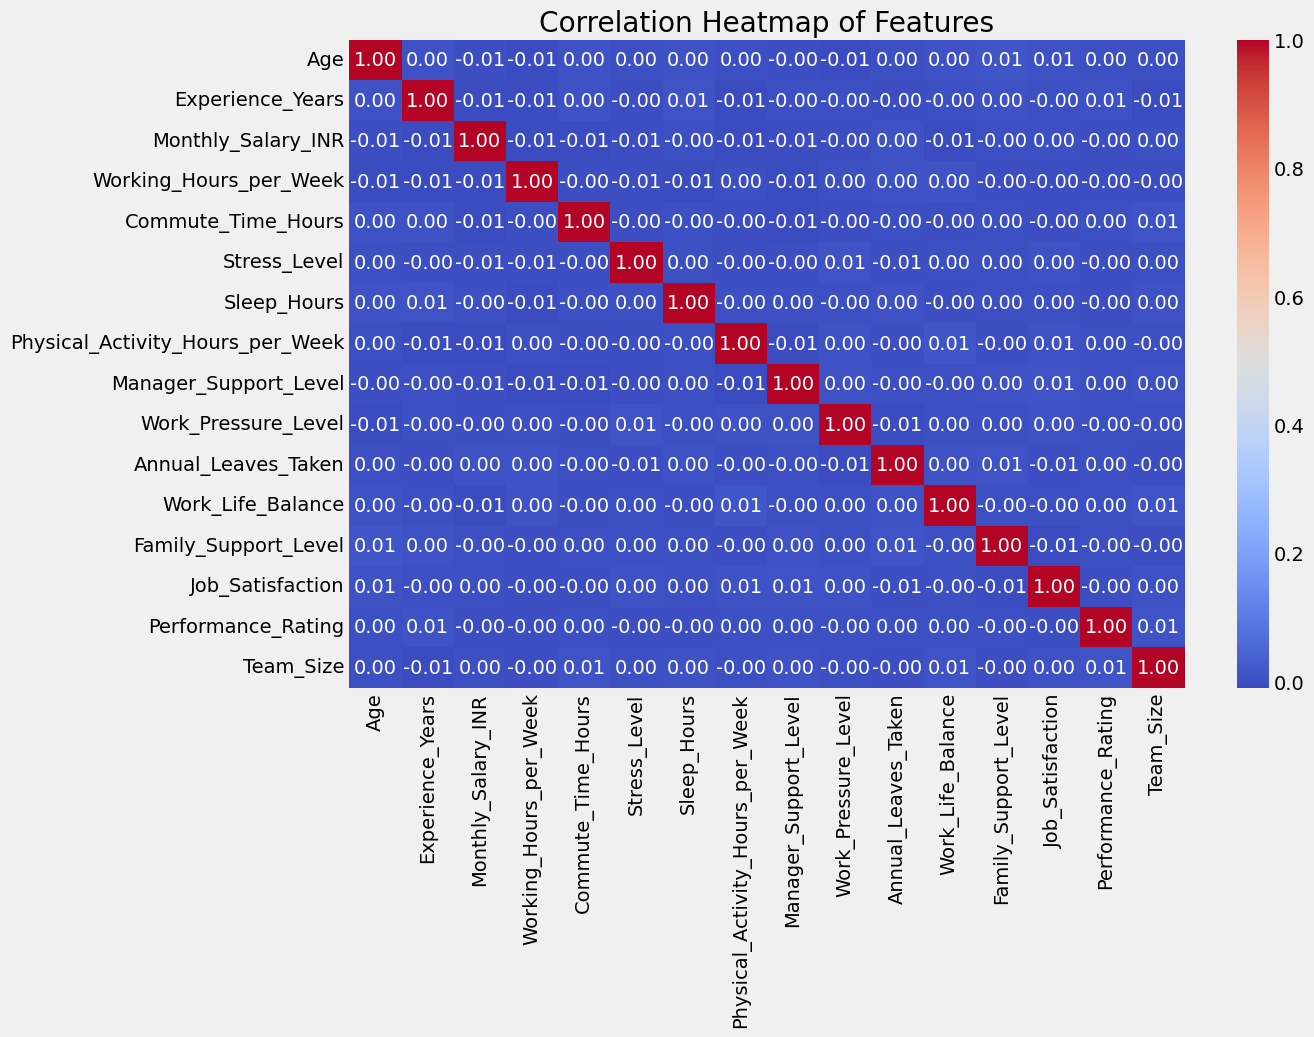

In [51]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


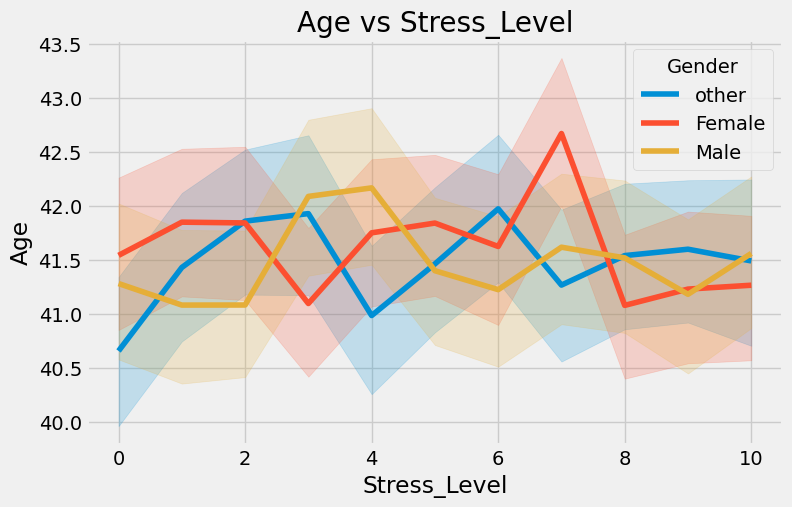

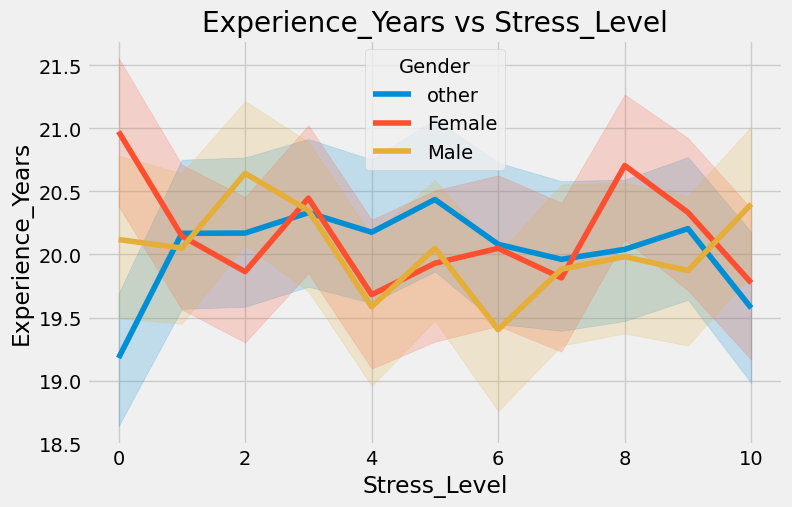

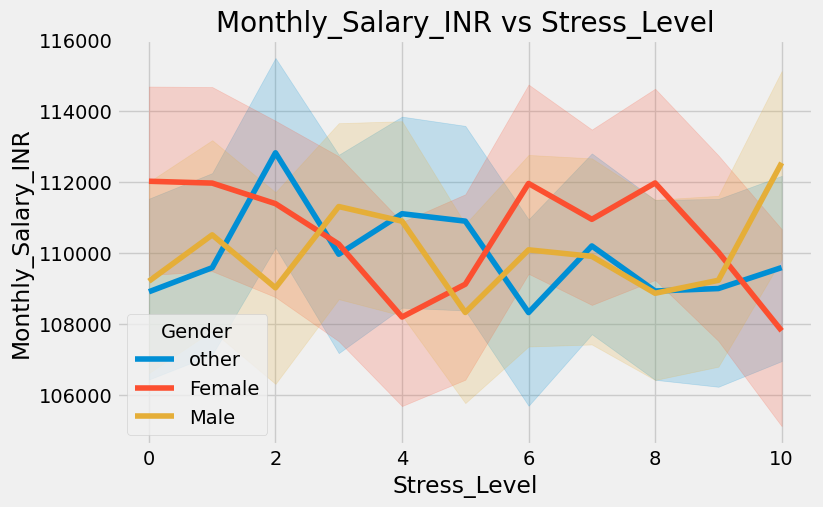

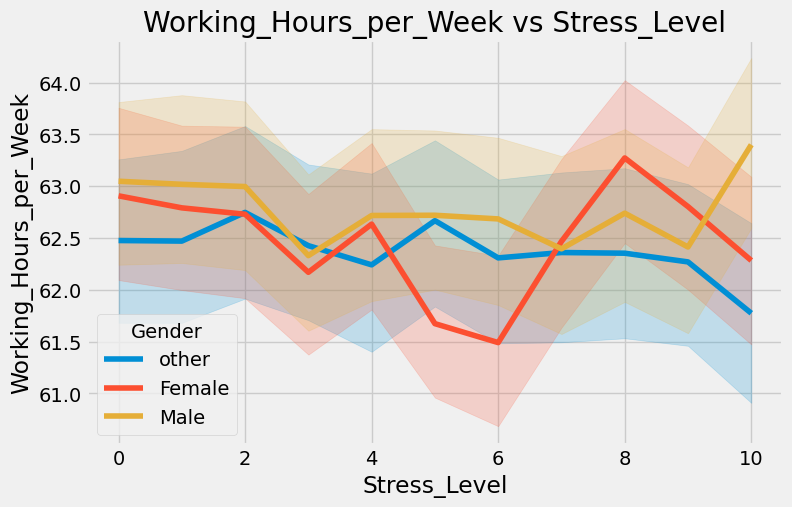

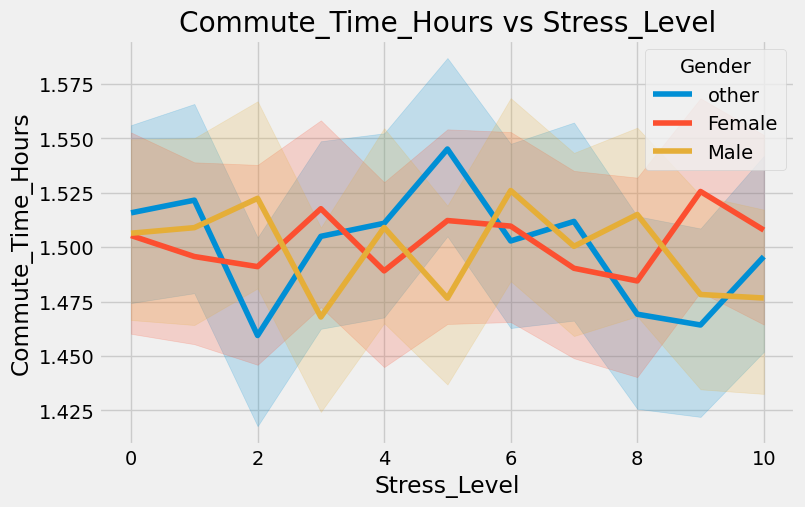

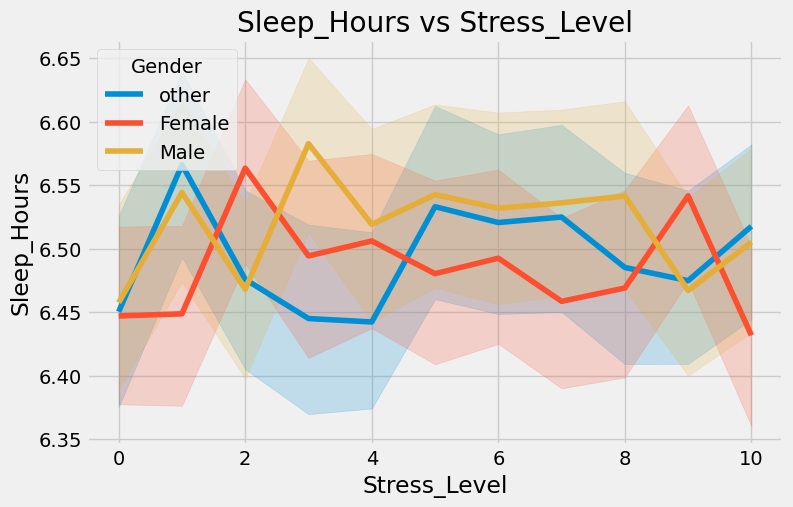

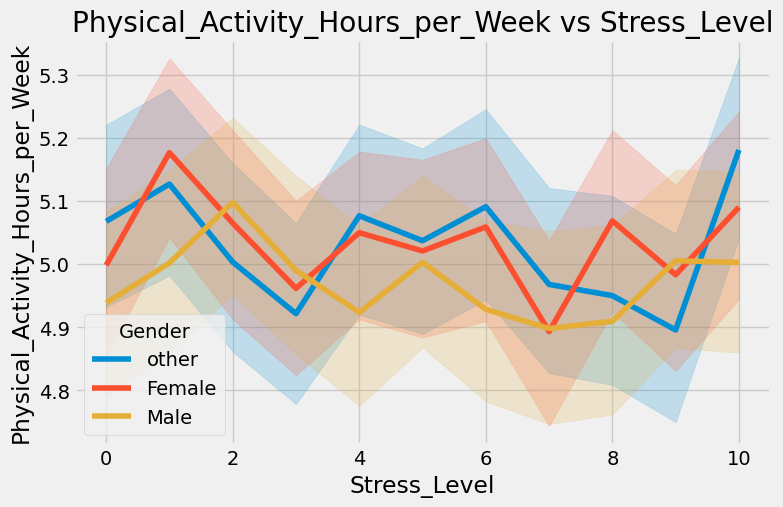

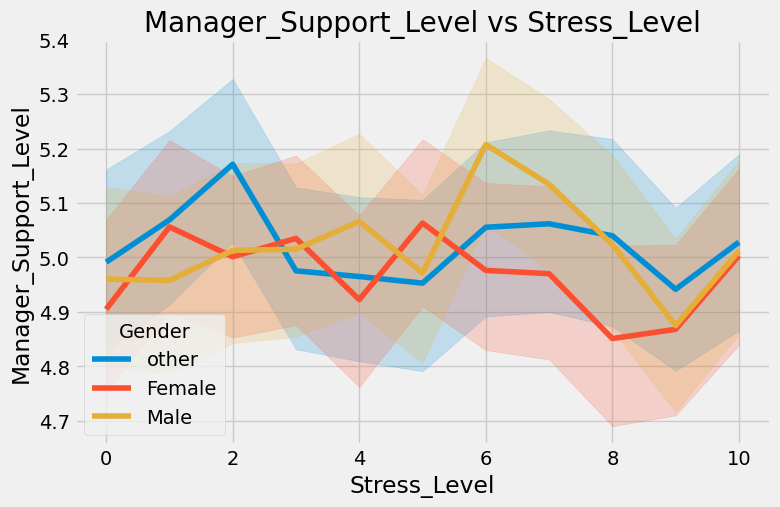

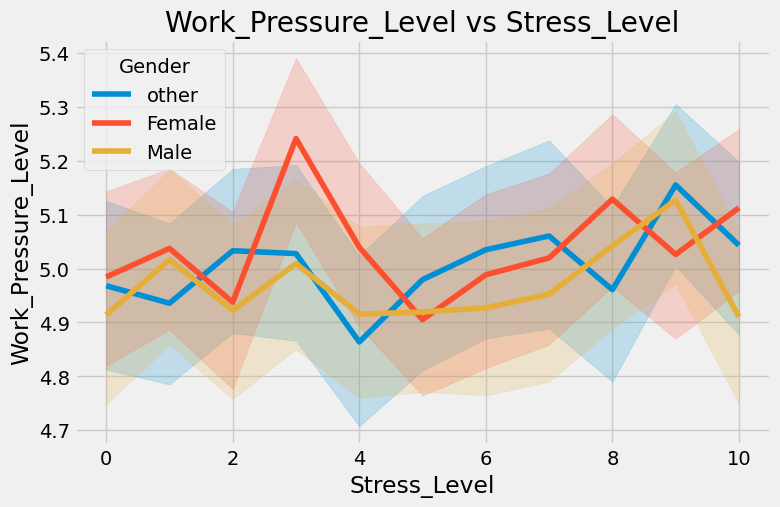

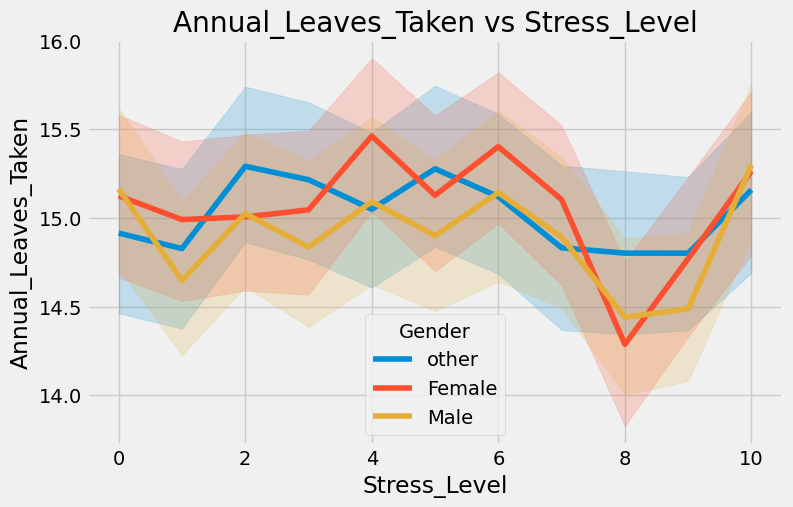

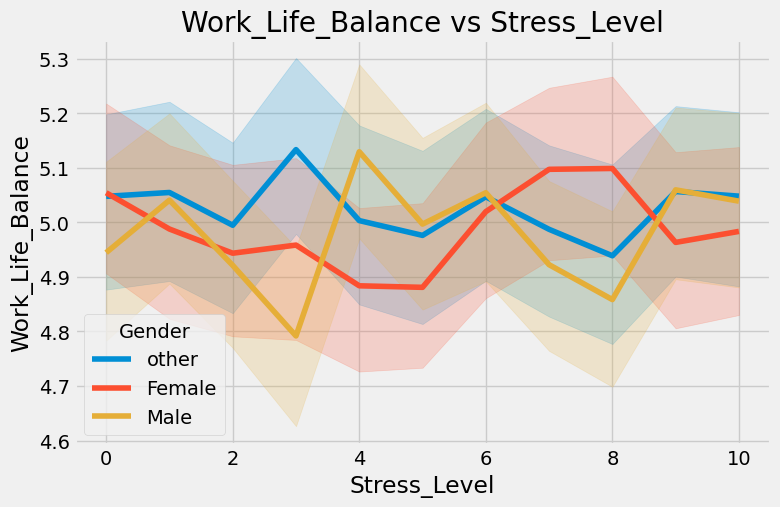

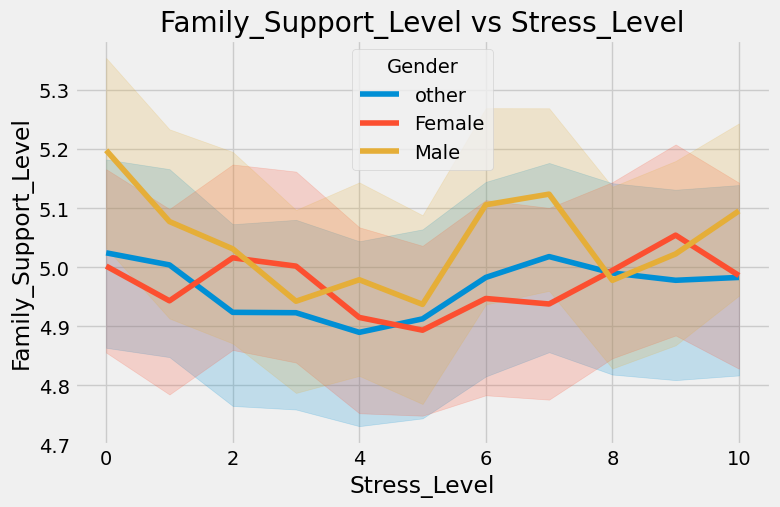

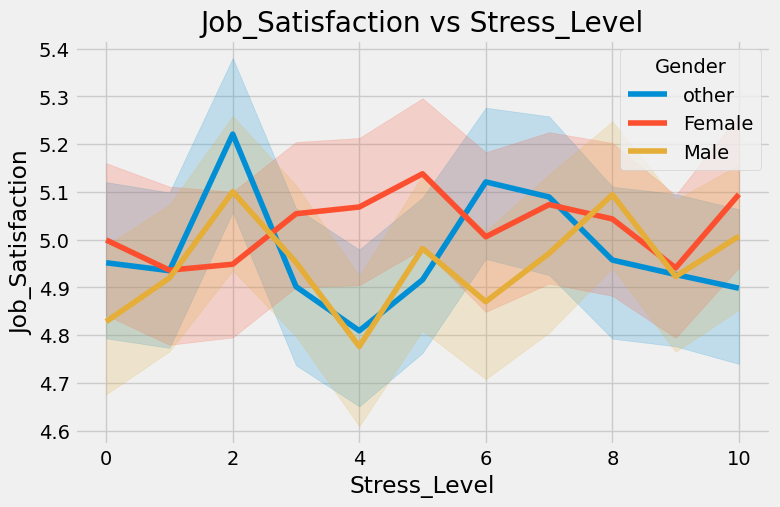

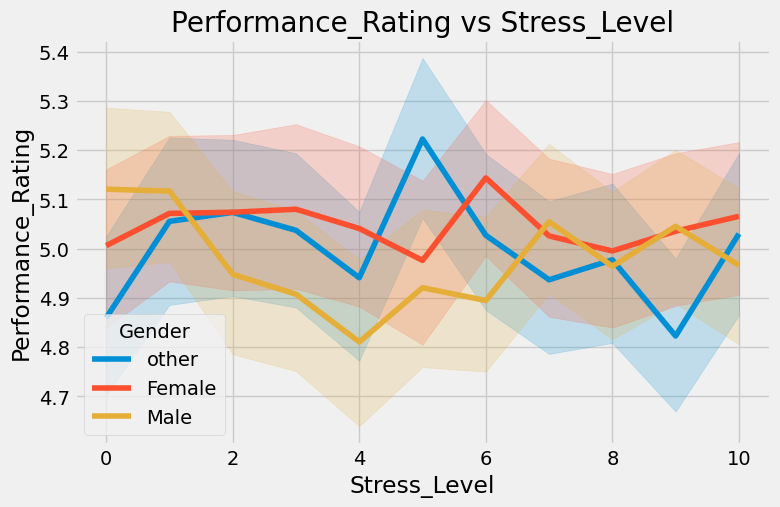

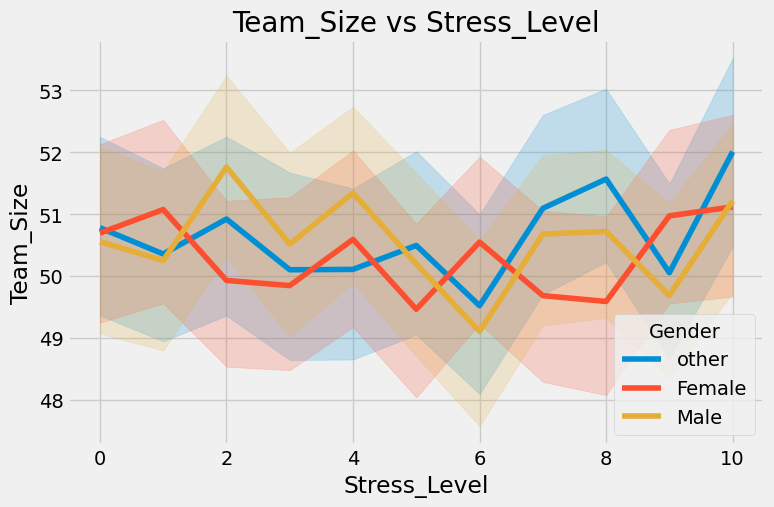

In [206]:
for col in num_cols:
  if col != 'Stress_Level':
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x='Stress_Level', y=col, hue='Gender')
    plt.title(f'{col} vs Stress_Level')
    plt.show()

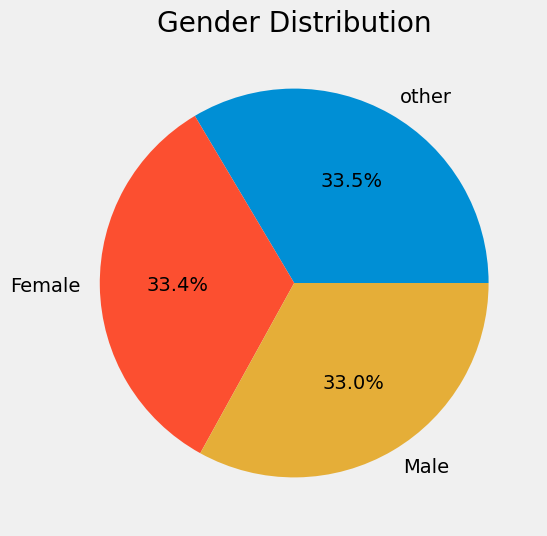

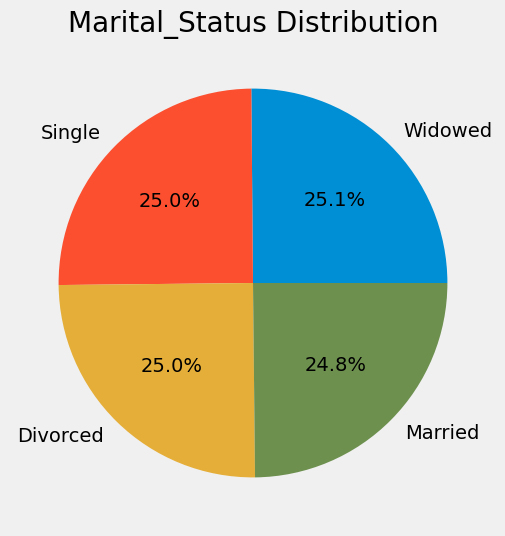

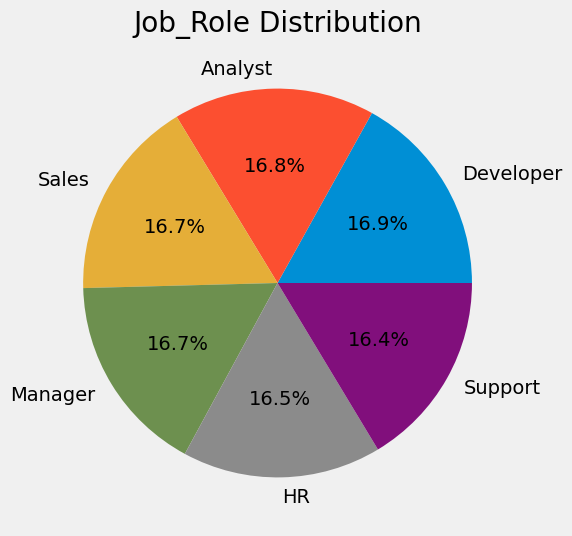

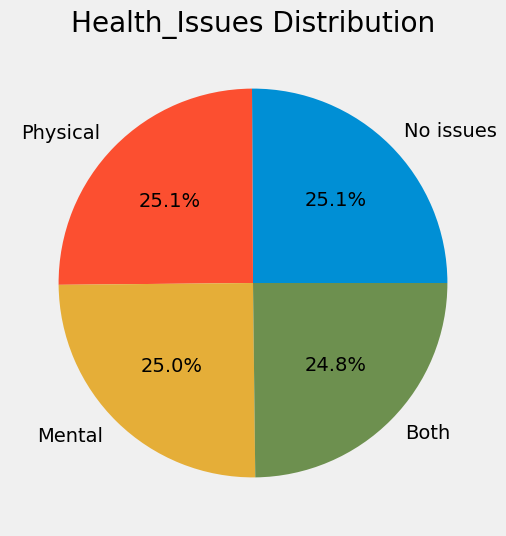

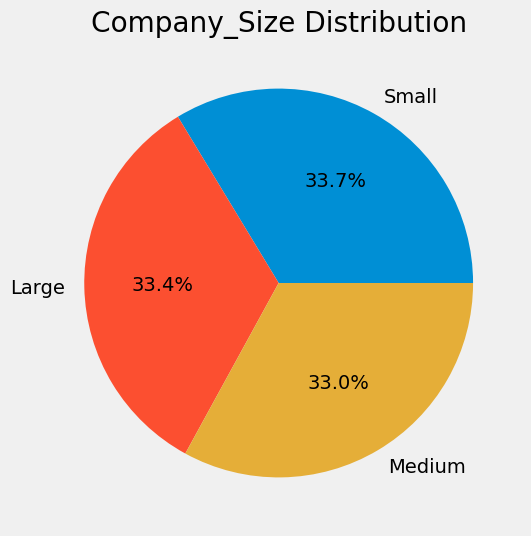

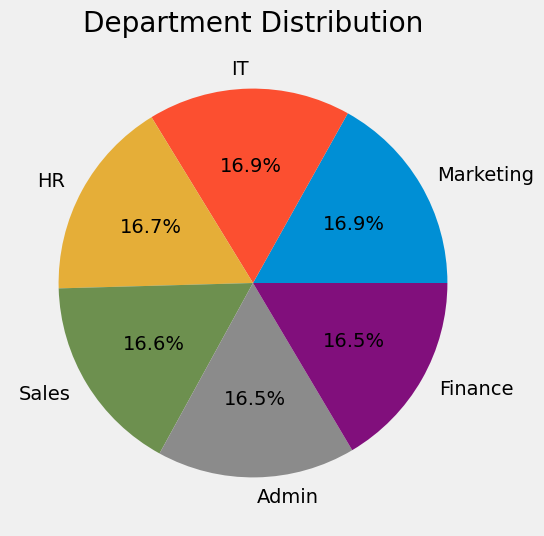

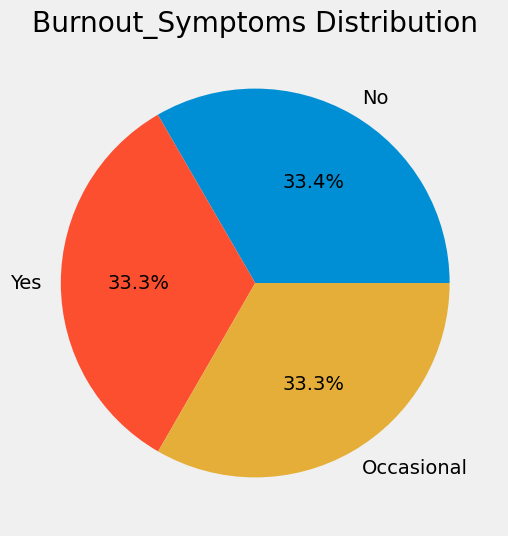

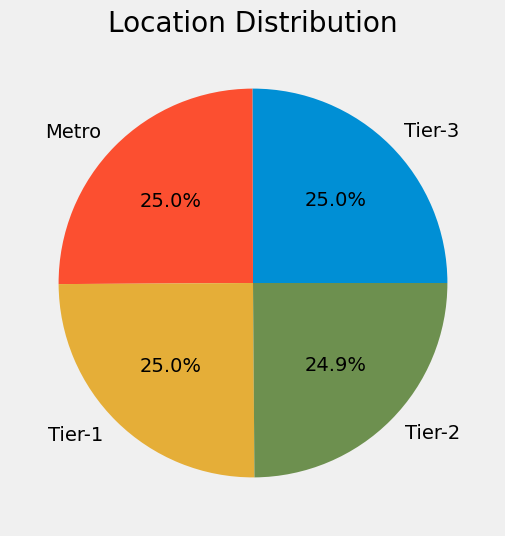

In [88]:
for col in cat_cols:
  plt.figure(figsize=(10, 6))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%' )
  plt.title(f'{col} Distribution')
  plt.show()

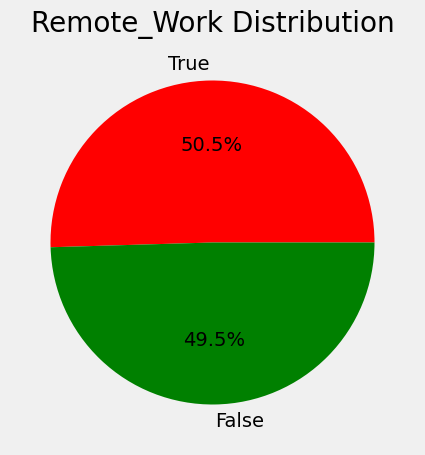

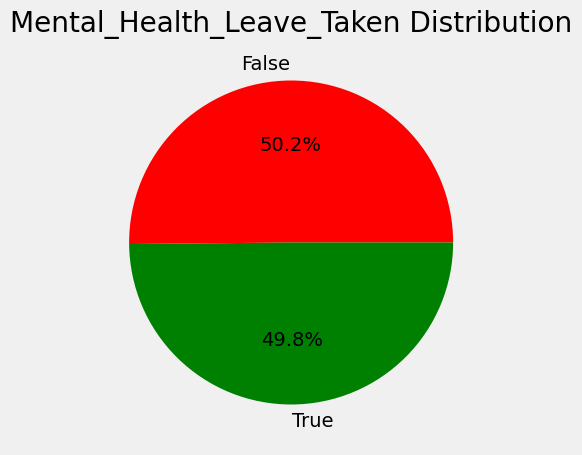

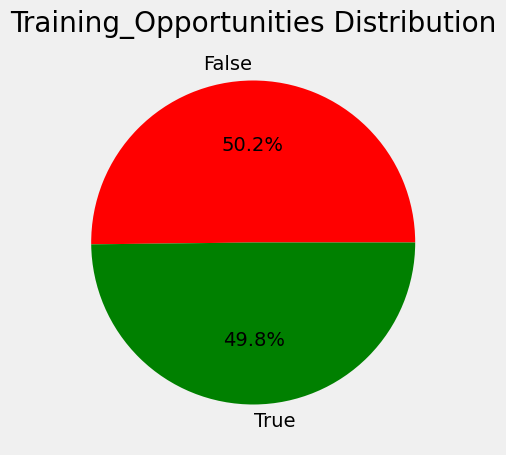

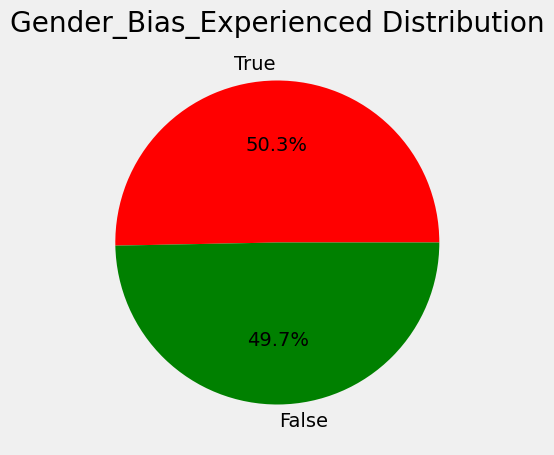

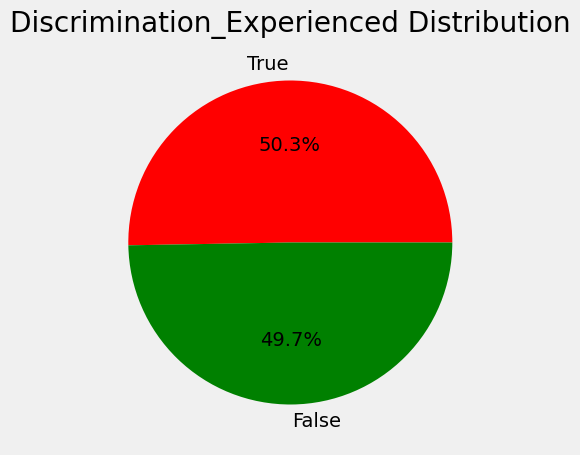

In [87]:
for col in bool_cols:
  if col != 'Gender':
      plt.figure(figsize=(8, 5))
      plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%' , colors=['red' , 'green'])
      plt.title(f'{col} Distribution')
      plt.show()



## **3.  Advanced EDA(Deeper Insights)**

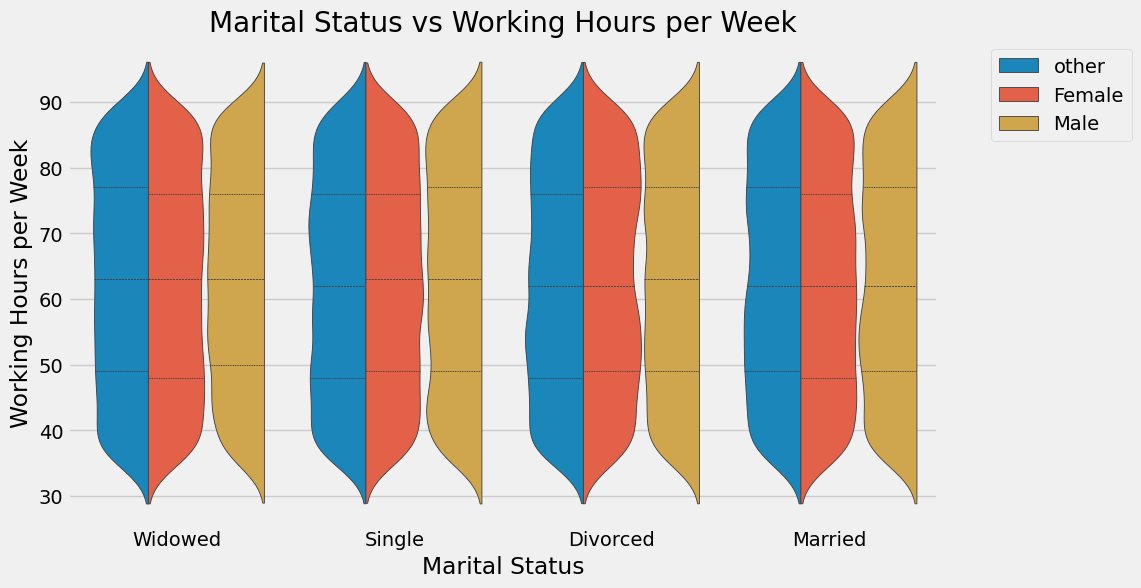

In [94]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Marital_Status' , y='Working_Hours_per_Week' , data=df , hue='Gender' , split=True , inner='quartile')
plt.title('Marital Status vs Working Hours per Week')
plt.xlabel('Marital Status')
plt.ylabel('Working Hours per Week')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

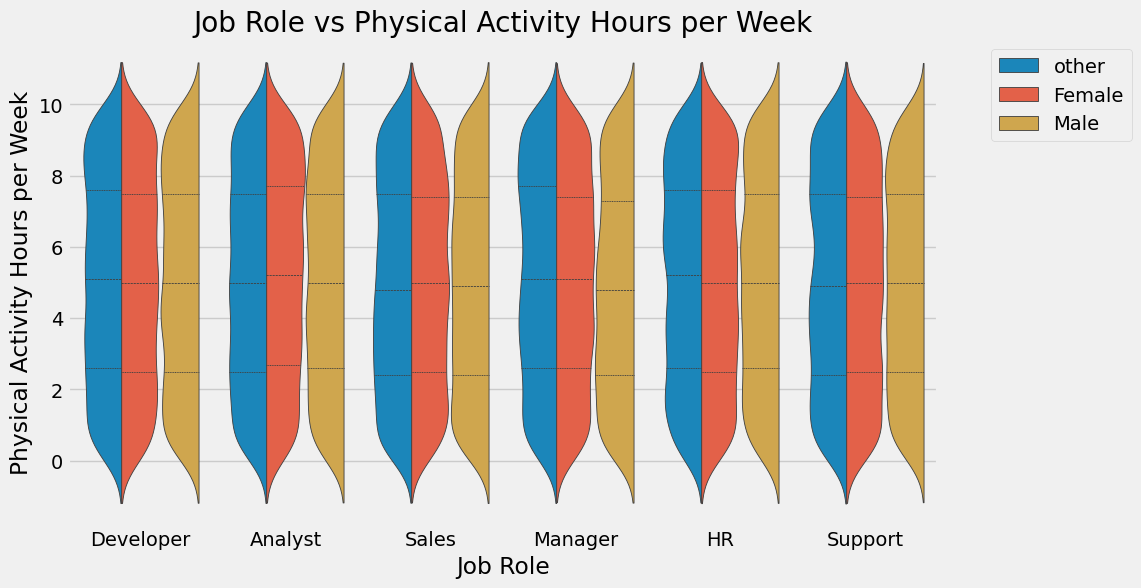

In [95]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Job_Role' , y='Physical_Activity_Hours_per_Week' , data=df , hue='Gender' , split=True , inner='quartile')
plt.title('Job Role vs Physical Activity Hours per Week')
plt.xlabel('Job Role')
plt.ylabel('Physical Activity Hours per Week')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

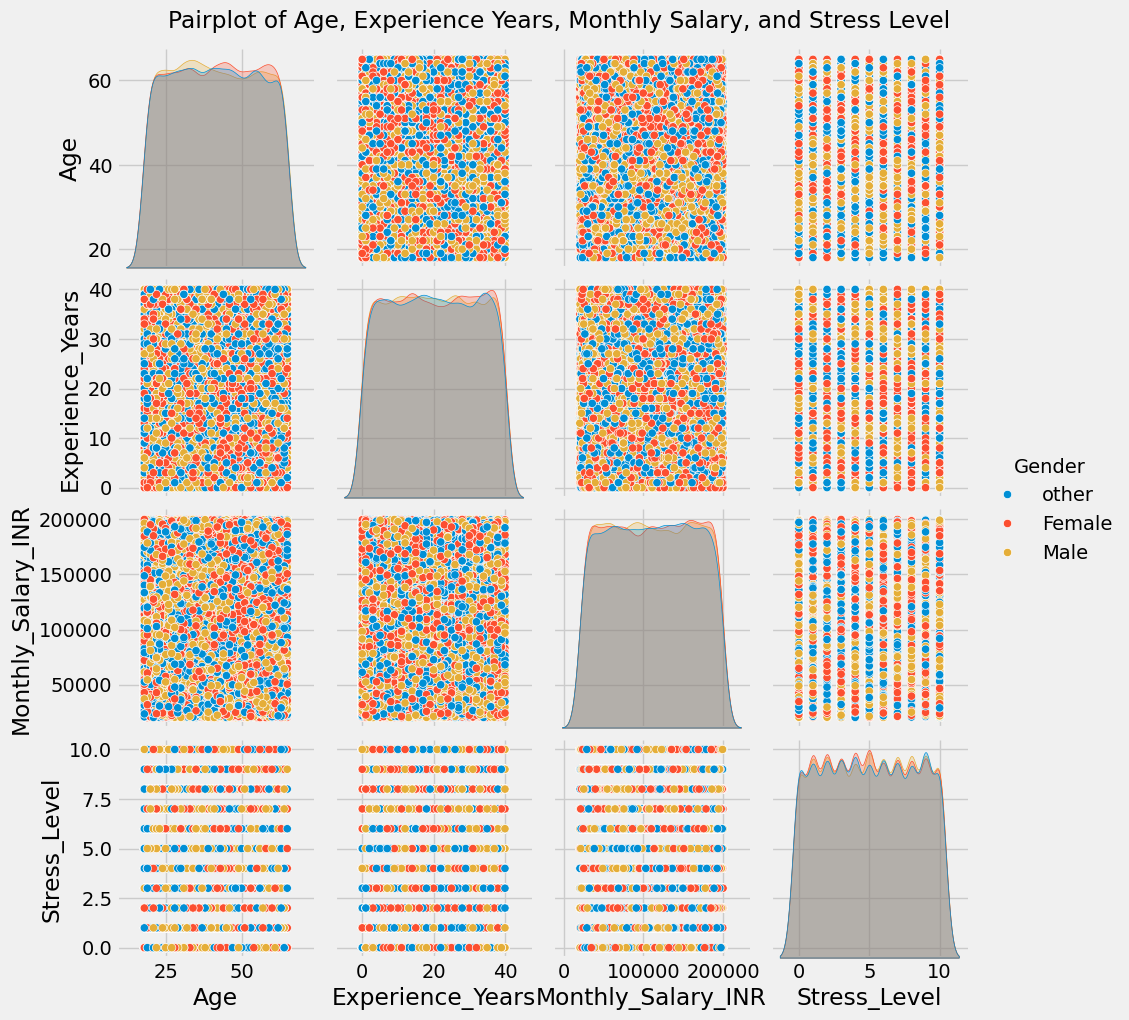

In [99]:

plt.figure(figsize=(10, 6))
sns.pairplot(df, vars=['Age', 'Experience_Years', 'Monthly_Salary_INR', 'Stress_Level'], hue='Gender')
plt.suptitle('Pairplot of Age, Experience Years, Monthly Salary, and Stress Level', y=1.02)
plt.show()

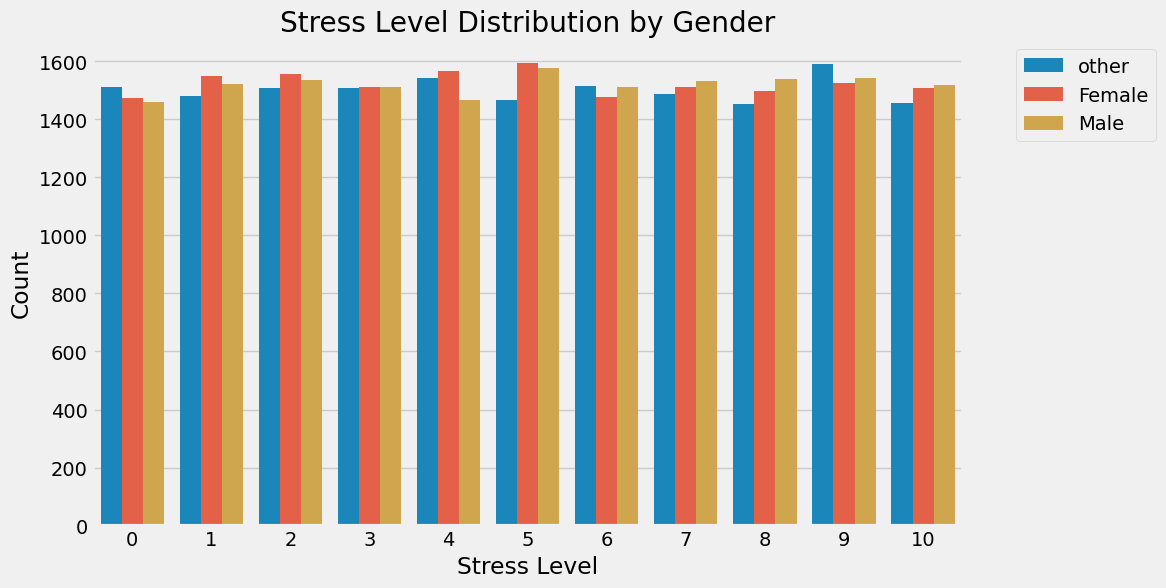

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress_Level', hue='Gender', data=df)
plt.title('Stress Level Distribution by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

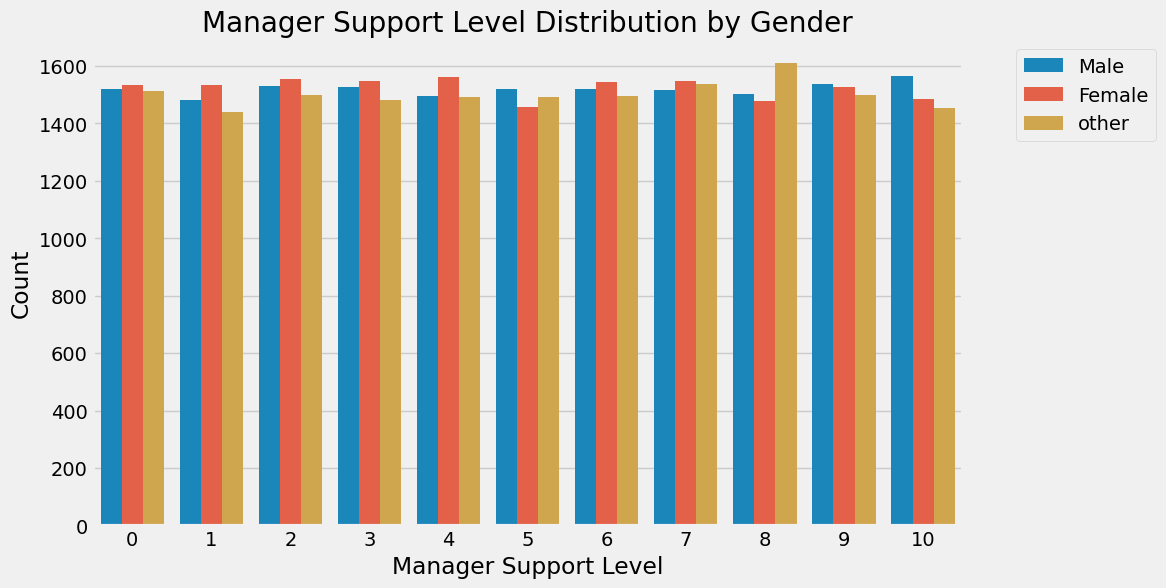

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Manager_Support_Level', hue='Gender', data=df)
plt.title('Manager Support Level Distribution by Gender')
plt.xlabel('Manager Support Level')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 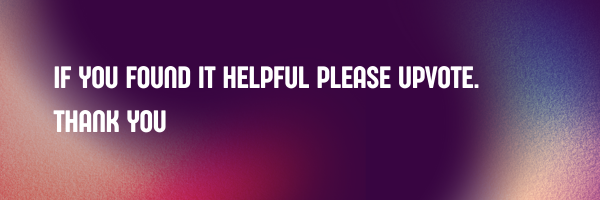